In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path
import os

DATA_PATH = Path("data/")
FIGURE_PATH = Path("figures/")
PROCESSED_DATA_PATH = Path("processed_data/")

# Create directories if they don't exist
FIGURE_PATH.mkdir(exist_ok=True)
PROCESSED_DATA_PATH.mkdir(exist_ok=True)

# Set up matplotlib for better figure saving
plt.rcParams["figure.dpi"] = 300
plt.rcParams["savefig.dpi"] = 300
plt.rcParams["savefig.bbox"] = "tight"


def save_figure(figure_name, title=None):
    """
    Save current figure with a descriptive filename

    Args:
        figure_name (str): Base name for the figure file
        title (str): Optional title to add to filename
    """
    if title:
        # Clean title for filename
        clean_title = "".join(
            c for c in title if c.isalnum() or c in (" ", "_", "-")
        ).rstrip()
        clean_title = clean_title.replace(" ", "_").lower()
        filename = f"{figure_name}_{clean_title}.png"
    else:
        filename = f"{figure_name}.png"

    filepath = FIGURE_PATH / filename
    plt.savefig(filepath, dpi=300, bbox_inches="tight")
    print(f"Figure saved: {filepath}")


def save_dataset(dataframe, filename, description=""):
    """
    Save processed dataset with description

    Args:
        dataframe (pd.DataFrame): DataFrame to save
        filename (str): Name of the file (without extension)
        description (str): Description of the dataset
    """
    filepath = PROCESSED_DATA_PATH / f"{filename}.csv"
    dataframe.to_csv(filepath, index=False)
    print(f"Dataset saved: {filepath}")
    if description:
        print(f"Description: {description}")

In [2]:
train_df = pd.read_csv(DATA_PATH / "X_train_G3tdtEn.csv")
test_df = pd.read_csv(DATA_PATH / "X_test_8skS2ey.csv")


/tmp/ipykernel_294448/3010495027.py:1: DtypeWarning: Columns (21,22,23,24,69,70,71,72,93,94,95,96,97,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120) have mixed types. Specify dtype option on import or set low_memory=False.
  train_df = pd.read_csv(DATA_PATH / "X_train_G3tdtEn.csv")
/tmp/ipykernel_294448/3010495027.py:2: DtypeWarning: Columns (20,21,22,23,24,68,69,70,71,72,92,93,94,95,96,97,106,107,108,109,110,111,112,113,114,115,116,117,118) have mixed types. Specify dtype option on import or set low_memory=False.
  test_df = pd.read_csv(DATA_PATH / "X_test_8skS2ey.csv")
/tmp/ipykernel_294448/3010495027.py:2: DtypeWarning: Columns (20,21,22,23,24,68,69,70,71,72,92,93,94,95,96,97,106,107,108,109,110,111,112,113,114,115,116,117,118) have mixed types. Specify dtype option on import or set low_memory=False.
  test_df = pd.read_csv(DATA_PATH / "X_test_8skS2ey.csv")


# Exploratory Data Analysis for Fraud Detection in Shopping Baskets

This notebook performs comprehensive exploratory data analysis on the NexiaBank dataset for detecting anomalous shopping baskets that could indicate fraudulent behavior.

## Dataset Overview

- **Training data**: 92,790 observations with 146 columns
- **Test data**: 23,198 observations with 146 columns
- **Purpose**: Identify atypical shopping baskets for fraud detection
- **Data structure**: Up to 24 items per basket with 6 categories of information per item


In [3]:
# Basic Data Information
print("Training Data Shape:", train_df.shape)
print("Test Data Shape:", test_df.shape)
print("\nTraining Data Info:")
print(train_df.info())
print("\nFirst few rows of training data:")
print(train_df.head())

Training Data Shape: (92790, 146)
Test Data Shape: (23198, 146)

Training Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 92790 entries, 0 to 92789
Columns: 146 entries, ID to Nb_of_items
dtypes: float64(49), int64(1), object(96)
memory usage: 103.4+ MB
None

First few rows of training data:
      ID                             item1                             item2  \
0  85517                         COMPUTERS                               NaN   
1  51113  COMPUTER PERIPHERALS ACCESSORIES                               NaN   
2  83008           TELEVISIONS HOME CINEMA                               NaN   
3  78712                         COMPUTERS  COMPUTER PERIPHERALS ACCESSORIES   
4  77846           TELEVISIONS HOME CINEMA                               NaN   

  item3 item4 item5 item6 item7 item8 item9  ... Nbr_of_prod_purchas16  \
0   NaN   NaN   NaN   NaN   NaN   NaN   NaN  ...                   NaN   
1   NaN   NaN   NaN   NaN   NaN   NaN   NaN  ...                 

In [4]:
# Column Analysis
print("Column Names:")
print(train_df.columns.tolist())
print(f"\nTotal columns: {len(train_df.columns)}")

# Identify column types based on the pattern
item_cols = [col for col in train_df.columns if col.startswith("item")]
price_cols = [col for col in train_df.columns if col.startswith("cash_price")]
make_cols = [col for col in train_df.columns if col.startswith("make")]
model_cols = [col for col in train_df.columns if col.startswith("model")]
goods_code_cols = [col for col in train_df.columns if col.startswith("goods_code")]
nbr_prod_cols = [
    col for col in train_df.columns if col.startswith("Nbr_of_prod_purchas")
]


print("Column categories:")
print(f"item columns: {len(item_cols)}")
print(f"cash_price columns: {len(price_cols)}")
print(f"make columns: {len(make_cols)}")
print(f"model columns: {len(model_cols)}")
print(f"goods_code columns: {len(goods_code_cols)}")
print(f"Nbr_of_prod_purchas columns: {len(nbr_prod_cols)}")
print(f"Nb_of_items column: {'Nb_of_items' in train_df.columns}")
print(f"ID column: {'ID' in train_df.columns}")

Column Names:
['ID', 'item1', 'item2', 'item3', 'item4', 'item5', 'item6', 'item7', 'item8', 'item9', 'item10', 'item11', 'item12', 'item13', 'item14', 'item15', 'item16', 'item17', 'item18', 'item19', 'item20', 'item21', 'item22', 'item23', 'item24', 'cash_price1', 'cash_price2', 'cash_price3', 'cash_price4', 'cash_price5', 'cash_price6', 'cash_price7', 'cash_price8', 'cash_price9', 'cash_price10', 'cash_price11', 'cash_price12', 'cash_price13', 'cash_price14', 'cash_price15', 'cash_price16', 'cash_price17', 'cash_price18', 'cash_price19', 'cash_price20', 'cash_price21', 'cash_price22', 'cash_price23', 'cash_price24', 'make1', 'make2', 'make3', 'make4', 'make5', 'make6', 'make7', 'make8', 'make9', 'make10', 'make11', 'make12', 'make13', 'make14', 'make15', 'make16', 'make17', 'make18', 'make19', 'make20', 'make21', 'make22', 'make23', 'make24', 'model1', 'model2', 'model3', 'model4', 'model5', 'model6', 'model7', 'model8', 'model9', 'model10', 'model11', 'model12', 'model13', 'model14

In [5]:
# Missing Values Analysis
print("Missing values in training data:")
missing_train = train_df.isnull().sum()
missing_percent_train = (missing_train / len(train_df)) * 100
missing_df = pd.DataFrame(
    {
        "Column": missing_train.index,
        "Missing_Count": missing_train.values,
        "Missing_Percentage": missing_percent_train.values,
    }
)
missing_df = missing_df[missing_df["Missing_Count"] > 0].sort_values(
    "Missing_Percentage", ascending=False
)
print(missing_df.head(20))

print("\nMissing values in test data:")
missing_test = test_df.isnull().sum()
missing_percent_test = (missing_test / len(test_df)) * 100
print(f"Test data has {missing_test.sum()} total missing values")

Missing values in training data:
                    Column  Missing_Count  Missing_Percentage
96                 model24          92747           99.953659
72                  make24          92747           99.953659
48            cash_price24          92747           99.953659
24                  item24          92747           99.953659
144  Nbr_of_prod_purchas24          92747           99.953659
120           goods_code24          92747           99.953659
71                  make23          92741           99.947193
95                 model23          92741           99.947193
119           goods_code23          92740           99.946115
143  Nbr_of_prod_purchas23          92740           99.946115
23                  item23          92740           99.946115
47            cash_price23          92740           99.946115
70                  make22          92728           99.933182
94                 model22          92728           99.933182
46            cash_price22          9

Distribution of number of items per basket:
count    92790.000000
mean         1.764479
std          1.462264
min          1.000000
25%          1.000000
50%          1.000000
75%          2.000000
max         60.000000
Name: Nb_of_items, dtype: float64

Value counts for Nb_of_items:
Nb_of_items
1.0     48134
2.0     31755
3.0      8339
4.0      2392
5.0       834
6.0       390
7.0       219
8.0       159
9.0        96
10.0       88
11.0       62
12.0       65
13.0       38
14.0       26
15.0       28
16.0       23
17.0       22
18.0       17
19.0       12
20.0       14
21.0       14
22.0       13
23.0        7
24.0        5
25.0        1
26.0        4
27.0        1
28.0        2
29.0        4
30.0        3
31.0        5
34.0        3
35.0        3
36.0        1
38.0        3
39.0        2
40.0        2
41.0        1
44.0        1
48.0        1
60.0        1
Name: count, dtype: int64


Figure saved: figures/01_items_distribution_distribution_of_number_of_items_per_basket.png


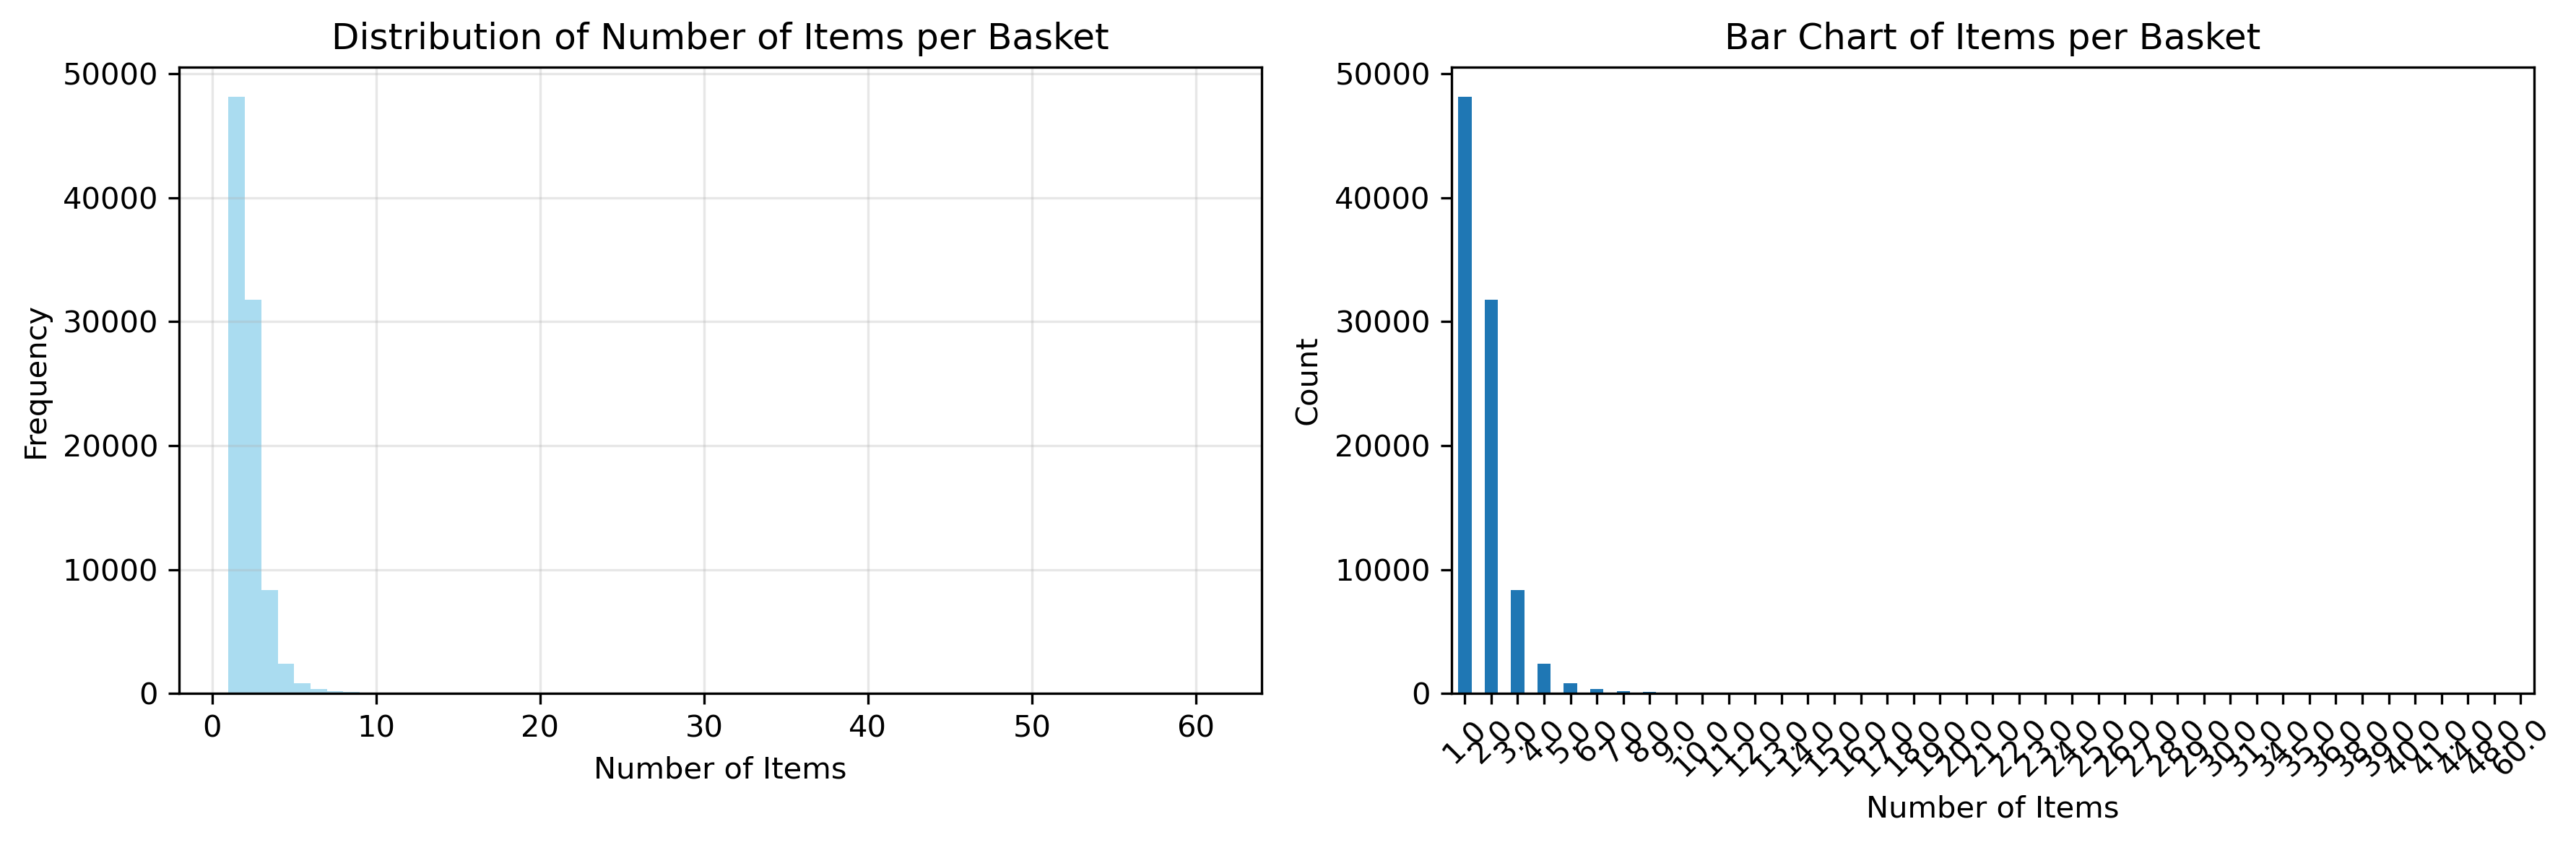

In [6]:
# Number of Items Analysis
print("Distribution of number of items per basket:")
print(train_df["Nb_of_items"].describe())
print("\nValue counts for Nb_of_items:")
print(train_df["Nb_of_items"].value_counts().sort_index())

# Visualization
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.hist(
    train_df["Nb_of_items"],
    bins=range(1, int(train_df["Nb_of_items"].max()) + 2),
    alpha=0.7,
    color="skyblue",
)
plt.xlabel("Number of Items")
plt.ylabel("Frequency")
plt.title("Distribution of Number of Items per Basket")
plt.grid(True, alpha=0.3)

plt.subplot(1, 2, 2)
train_df["Nb_of_items"].value_counts().sort_index().plot(kind="bar")
plt.xlabel("Number of Items")
plt.ylabel("Count")
plt.title("Bar Chart of Items per Basket")
plt.xticks(rotation=45)

plt.tight_layout()
save_figure("01_items_distribution", "Distribution of Number of Items per Basket")
plt.show()

Basket value statistics:
count    92790.000000
mean      1234.759554
std        771.484197
min        219.000000
25%        779.000000
50%       1099.000000
75%       1499.000000
max      21995.000000
Name: TOTAL_BASKET_VALUE, dtype: float64

All item prices statistics (total items: 163357):
count    163357.000000
mean        701.367796
std         741.977463
min           0.000000
25%          70.000000
50%         549.000000
75%        1099.000000
max       21995.000000
dtype: float64
Figure saved: figures/02_price_analysis_comprehensive_price_analysis.png
Figure saved: figures/02_price_analysis_comprehensive_price_analysis.png


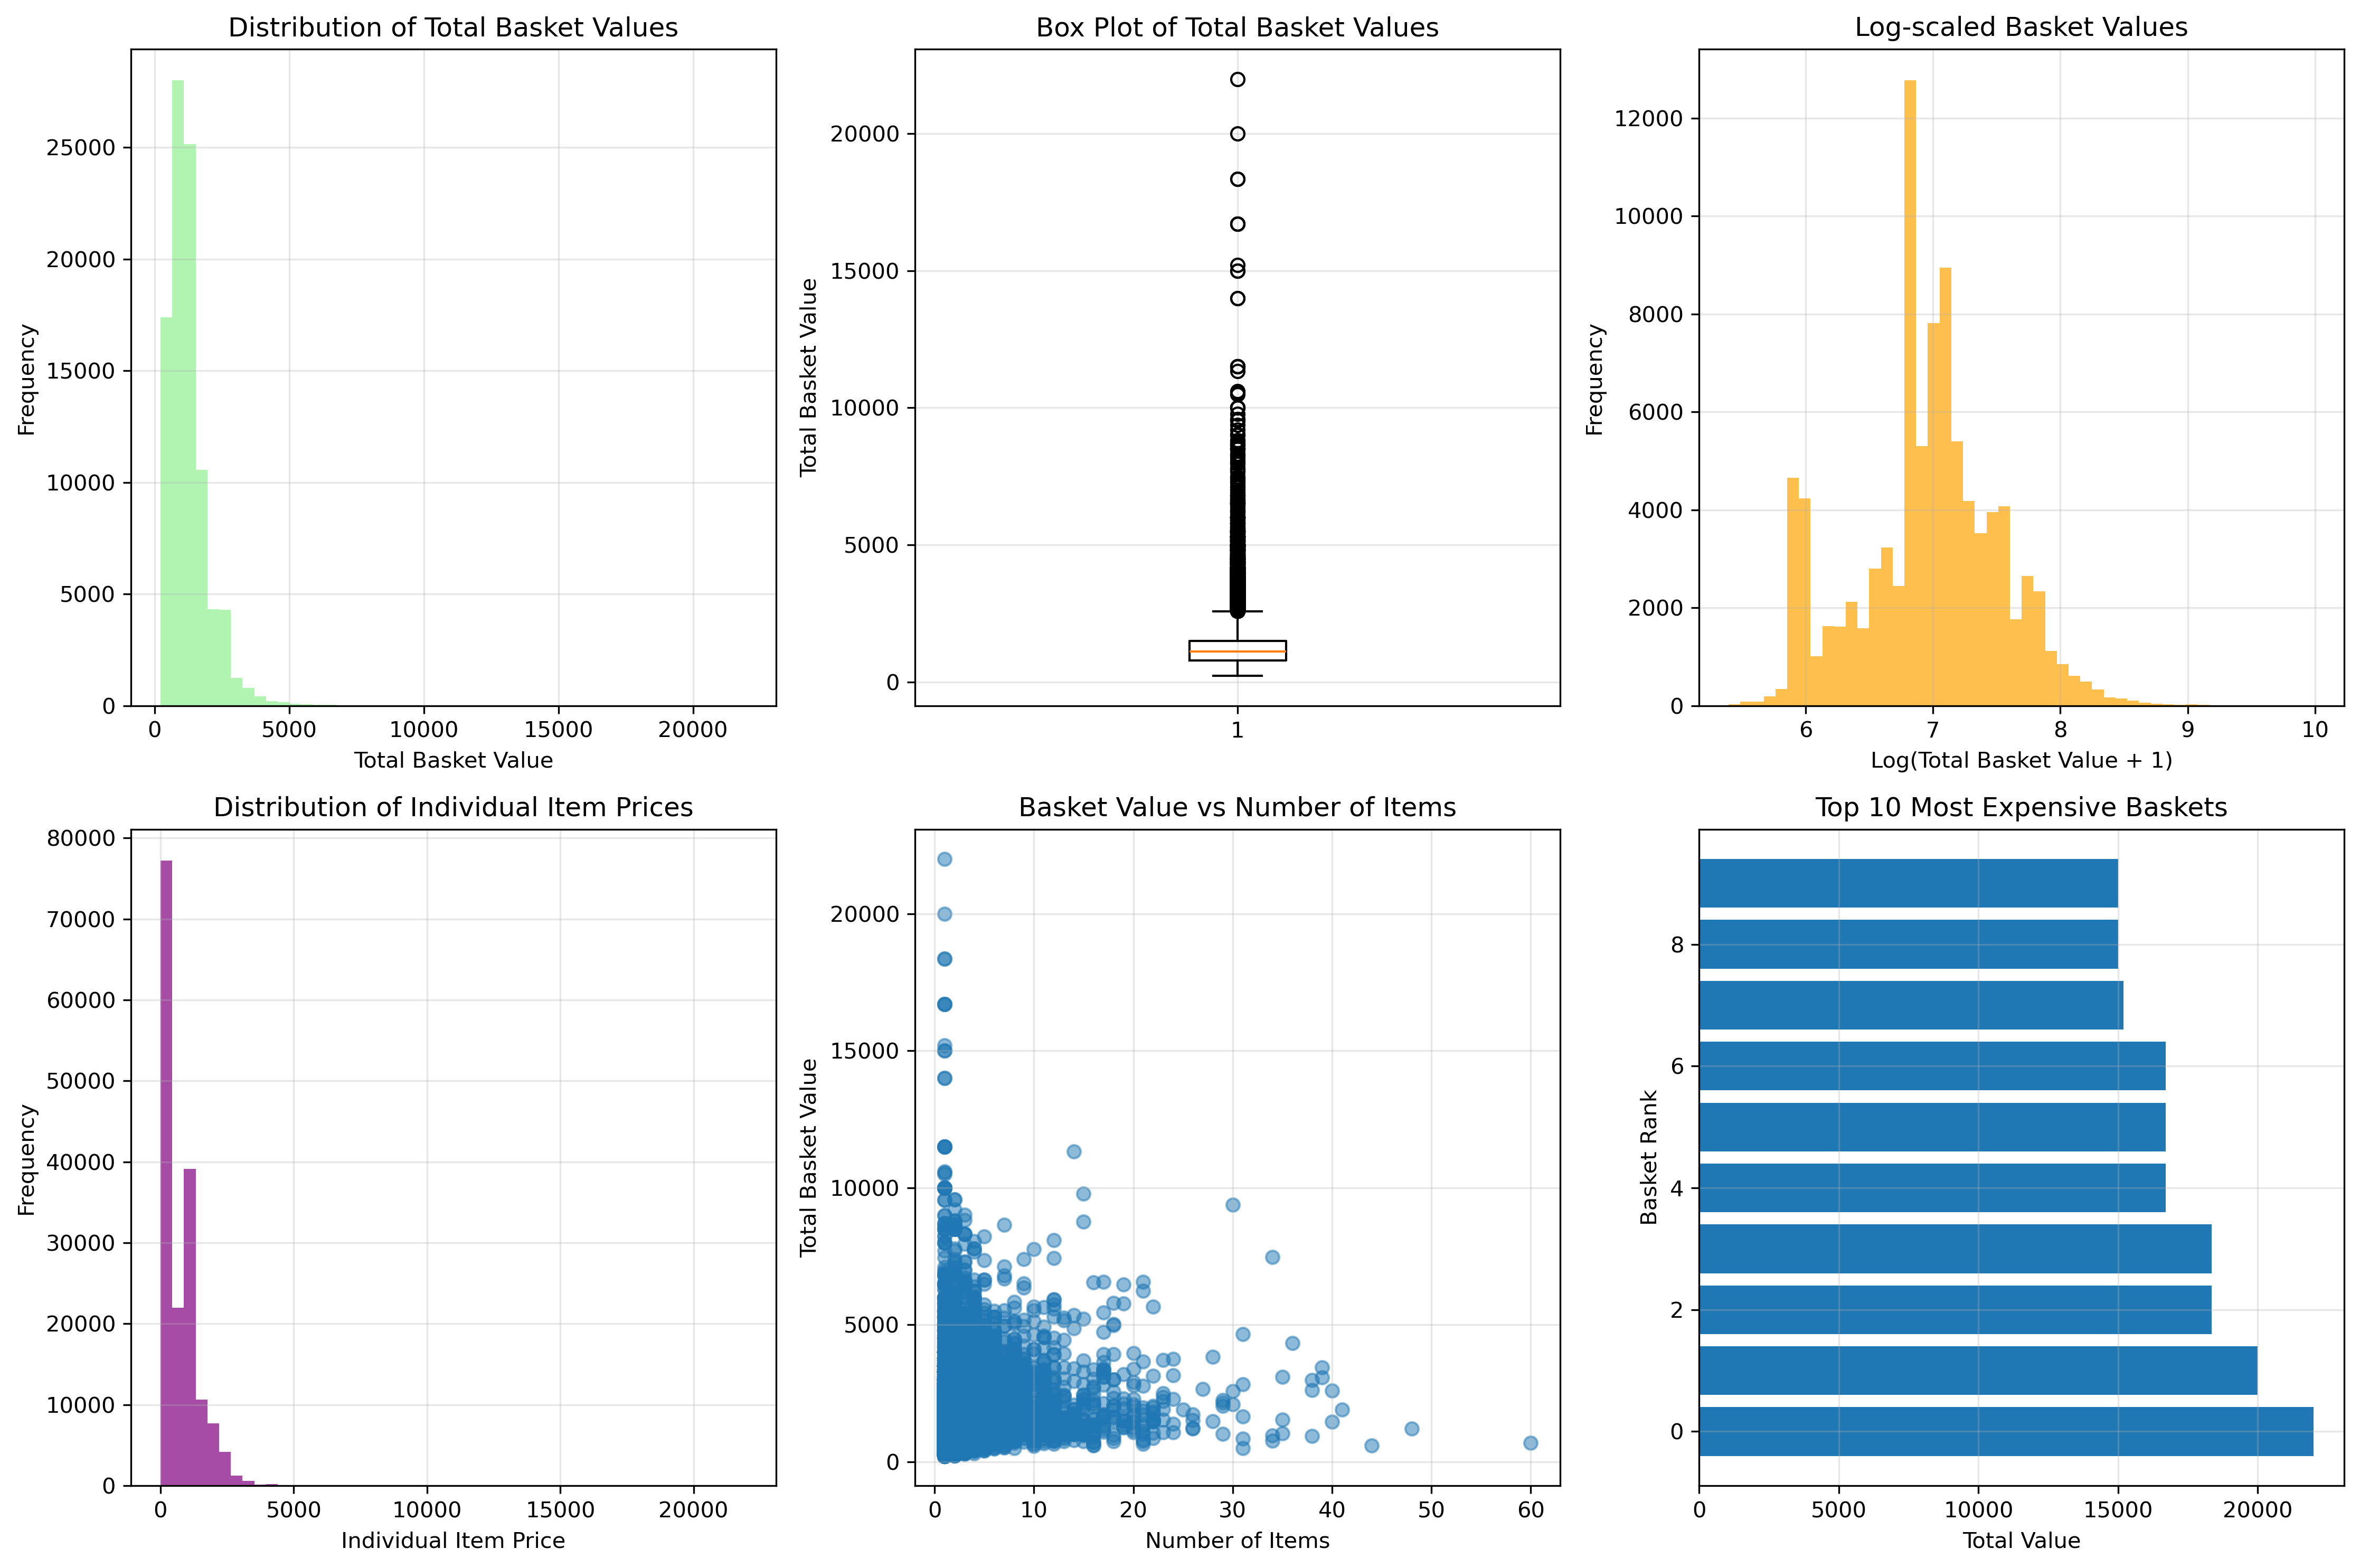

Dataset saved: processed_data/train_with_basket_value.csv
Description: Training data with calculated total basket values
Dataset saved: processed_data/test_with_basket_value.csv
Description: Test data with calculated total basket values
Dataset saved: processed_data/test_with_basket_value.csv
Description: Test data with calculated total basket values
Dataset saved: processed_data/individual_item_prices.csv
Description: All individual item prices extracted from training data
Dataset saved: processed_data/individual_item_prices.csv
Description: All individual item prices extracted from training data


In [7]:
# Price Analysis
# Calculate total basket value
train_df["TOTAL_BASKET_VALUE"] = train_df[price_cols].sum(axis=1)
test_df["TOTAL_BASKET_VALUE"] = test_df[price_cols].sum(axis=1)

print("Basket value statistics:")
print(train_df["TOTAL_BASKET_VALUE"].describe())

# Individual item prices
all_prices = []
for col in price_cols:
    prices = train_df[col].dropna()
    all_prices.extend(prices.tolist())

print(f"\nAll item prices statistics (total items: {len(all_prices)}):")
print(pd.Series(all_prices).describe())

# Visualizations
plt.figure(figsize=(15, 10))

plt.subplot(2, 3, 1)
plt.hist(train_df["TOTAL_BASKET_VALUE"], bins=50, alpha=0.7, color="lightgreen")
plt.xlabel("Total Basket Value")
plt.ylabel("Frequency")
plt.title("Distribution of Total Basket Values")
plt.grid(True, alpha=0.3)

plt.subplot(2, 3, 2)
plt.boxplot(train_df["TOTAL_BASKET_VALUE"])
plt.ylabel("Total Basket Value")
plt.title("Box Plot of Total Basket Values")
plt.grid(True, alpha=0.3)

plt.subplot(2, 3, 3)
# Log scale for better visualization of price distribution
plt.hist(np.log1p(train_df["TOTAL_BASKET_VALUE"]), bins=50, alpha=0.7, color="orange")
plt.xlabel("Log(Total Basket Value + 1)")
plt.ylabel("Frequency")
plt.title("Log-scaled Basket Values")
plt.grid(True, alpha=0.3)

plt.subplot(2, 3, 4)
plt.hist(all_prices, bins=50, alpha=0.7, color="purple")
plt.xlabel("Individual Item Price")
plt.ylabel("Frequency")
plt.title("Distribution of Individual Item Prices")
plt.grid(True, alpha=0.3)

plt.subplot(2, 3, 5)
# Price vs Number of Items scatter plot
plt.scatter(train_df["Nb_of_items"], train_df["TOTAL_BASKET_VALUE"], alpha=0.5)
plt.xlabel("Number of Items")
plt.ylabel("Total Basket Value")
plt.title("Basket Value vs Number of Items")
plt.grid(True, alpha=0.3)

plt.subplot(2, 3, 6)
# Top 10 most expensive baskets
top_expensive = train_df.nlargest(10, "TOTAL_BASKET_VALUE")
plt.barh(range(len(top_expensive)), top_expensive["TOTAL_BASKET_VALUE"])
plt.ylabel("Basket Rank")
plt.xlabel("Total Value")
plt.title("Top 10 Most Expensive Baskets")
plt.grid(True, alpha=0.3)

plt.tight_layout()
save_figure("02_price_analysis", "Comprehensive Price Analysis")
plt.show()

# Save processed datasets with basket values
save_dataset(
    train_df,
    "train_with_basket_value",
    "Training data with calculated total basket values",
)
save_dataset(
    test_df, "test_with_basket_value", "Test data with calculated total basket values"
)

# Save individual prices for further analysis
prices_df = pd.DataFrame({"individual_prices": all_prices})
save_dataset(
    prices_df,
    "individual_item_prices",
    "All individual item prices extracted from training data",
)

=== ITEM CATEGORIES ANALYSIS ===



Total unique item categories: 173

Top 20 most frequent item categories:
COMPUTERS                                    50221
FULFILMENT CHARGE                            25023
COMPUTER PERIPHERALS ACCESSORIES             17418
TELEVISIONS HOME CINEMA                      14051
WARRANTY                                      8213
LIVING DINING FURNITURE                       7434
BEDROOM FURNITURE                             4798
SERVICE                                       3375
TELEPHONES, FAX MACHINES & TWO-WAY RADIOS     3138
COMPUTER PERIPHERALS & ACCESSORIES            2769
BED LINEN                                     2255
LIVING & DINING FURNITURE                     1900
OUTDOOR FURNITURE                             1754
AUDIO ACCESSORIES                             1670
TELEPHONES FAX MACHINES TWO-WAY RADIOS        1513
CABLES ADAPTERS                               1452
BABY CHILD TRAVEL                             1161
LIGHTING                                      1090
BAGS CAR

/tmp/ipykernel_294448/3912051683.py:66: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(data_for_boxplot, labels=labels_for_boxplot)


Figure saved: figures/03_category_analysis_product_category_analysis.png


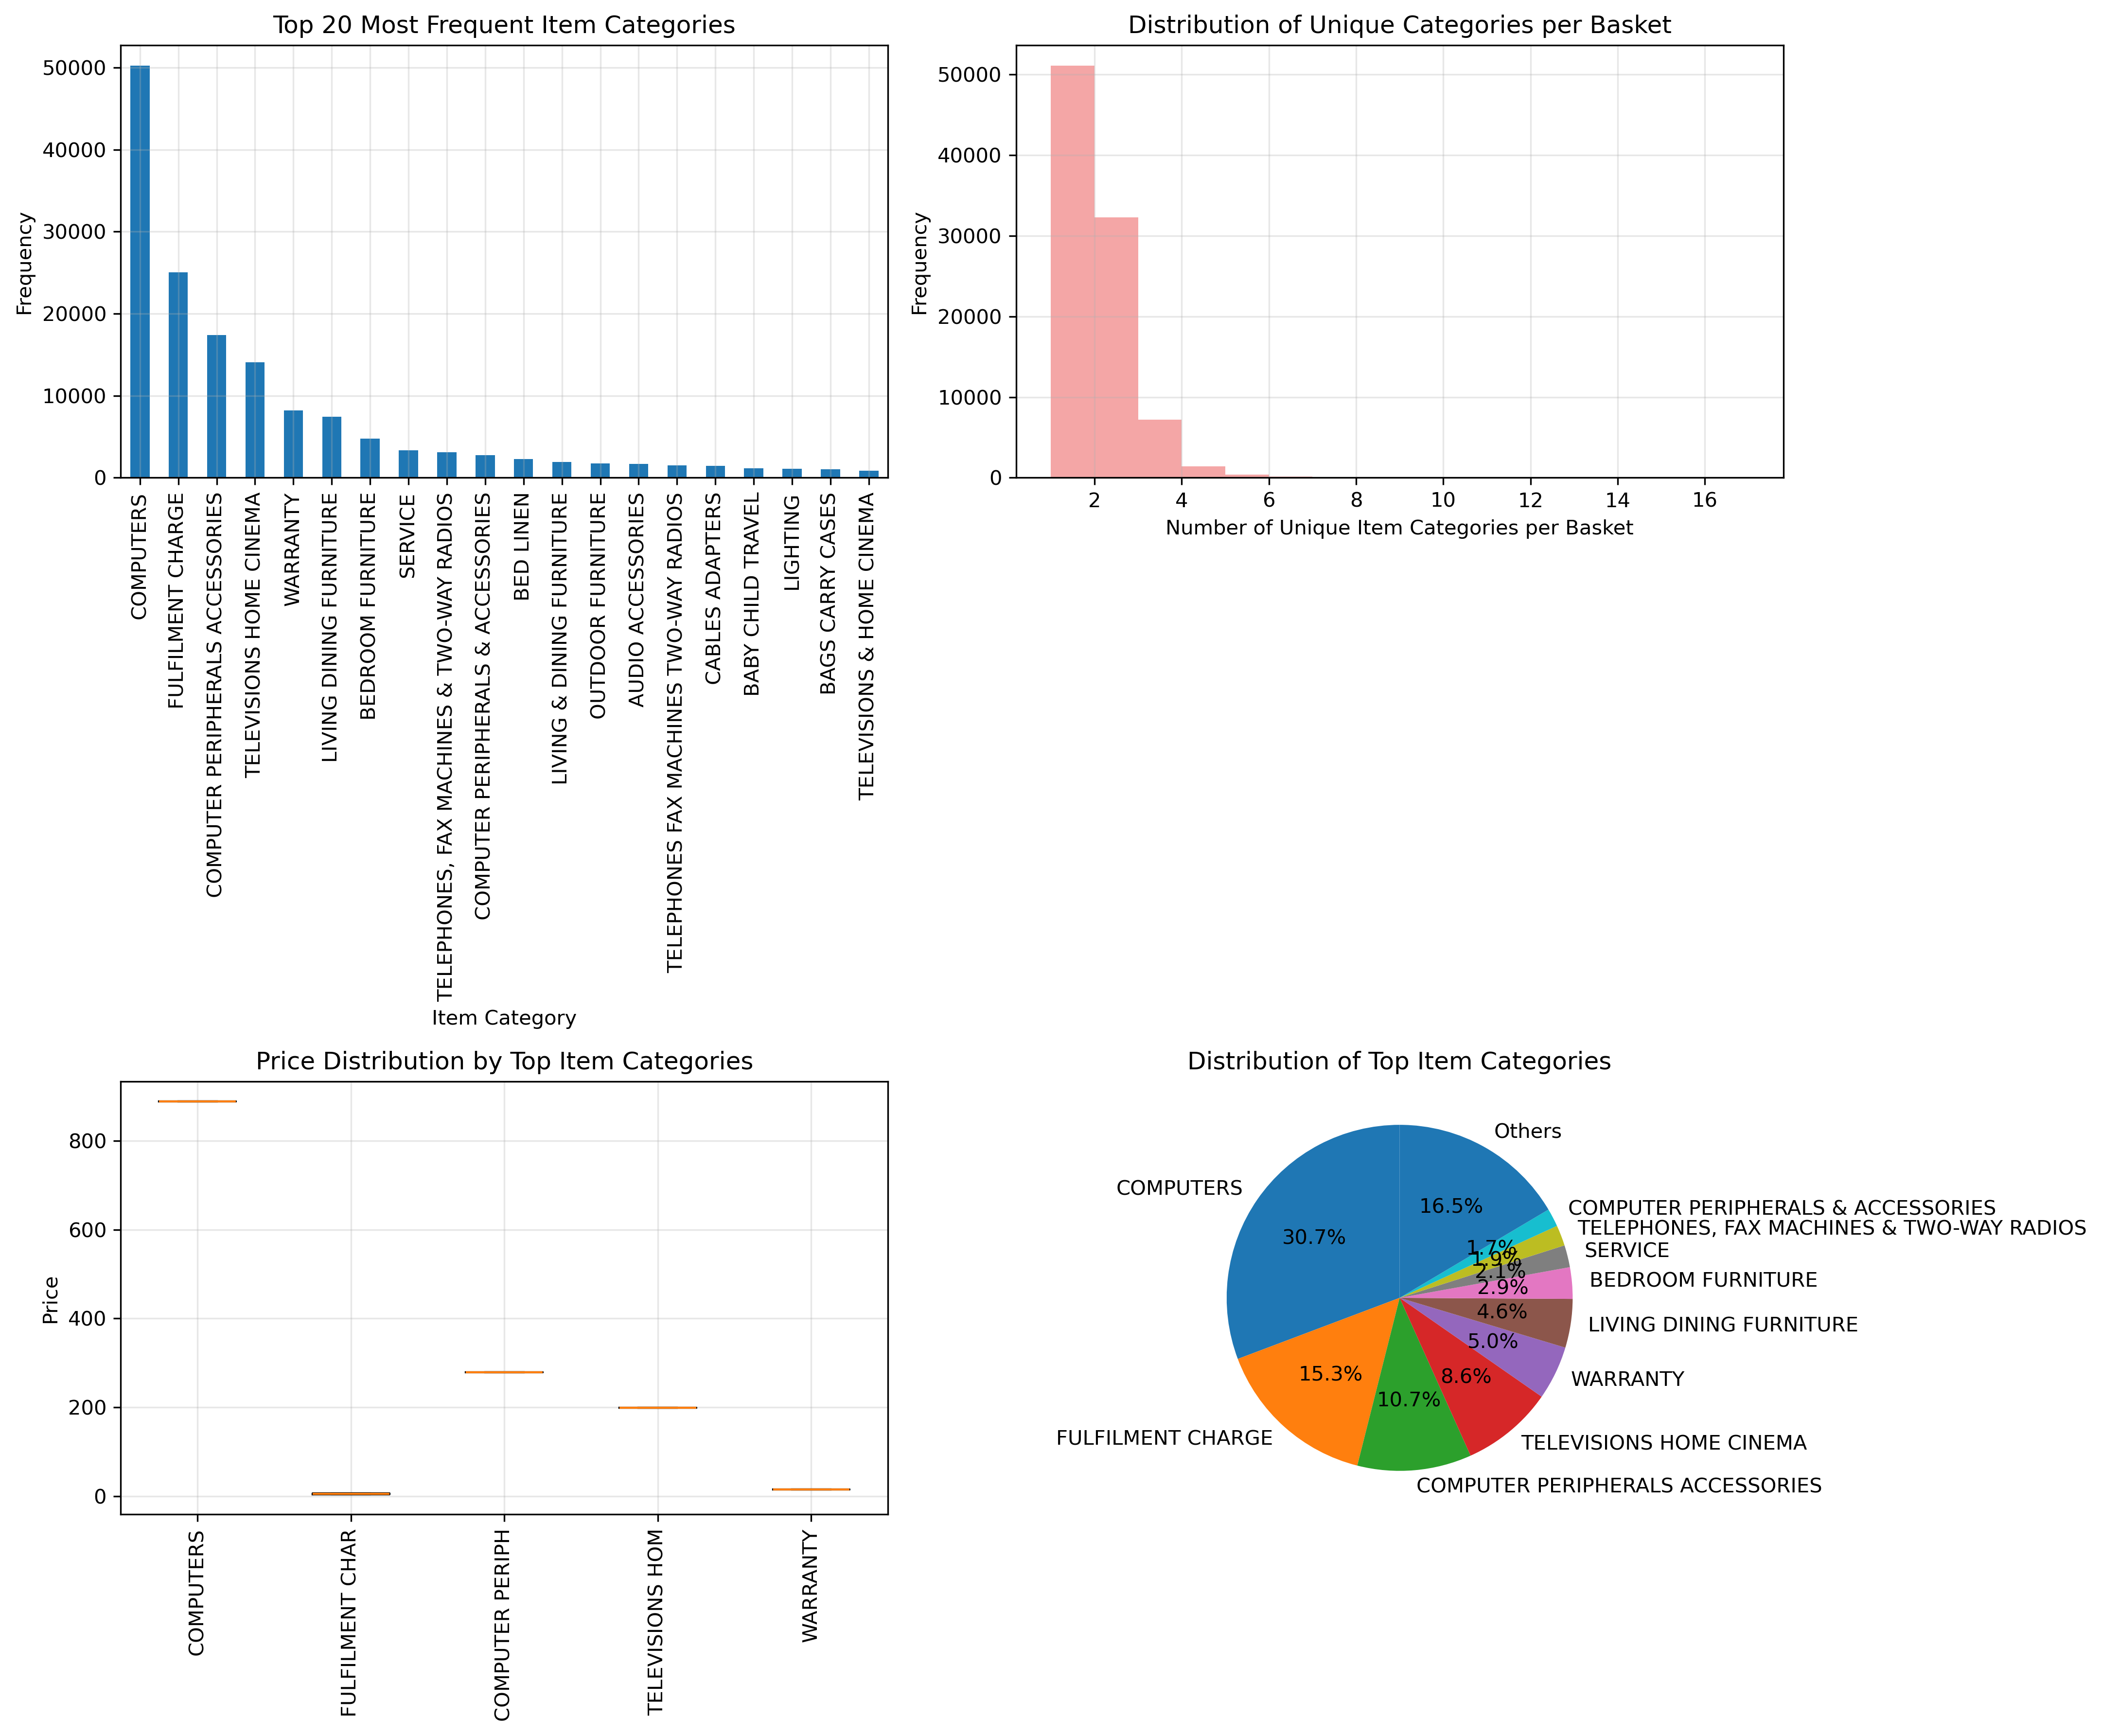

Dataset saved: processed_data/category_frequency_analysis.csv
Description: Frequency analysis of all item categories
Dataset saved: processed_data/category_price_analysis.csv
Description: Price statistics by item category


In [8]:
# Product Category Analysis
print("=== ITEM CATEGORIES ANALYSIS ===")
all_items = []
for col in item_cols:
    items = train_df[col].dropna()
    all_items.extend(items.tolist())

item_counts = pd.Series(all_items).value_counts()
print(f"\nTotal unique item categories: {len(item_counts)}")
print("\nTop 20 most frequent item categories:")
print(item_counts.head(20))

# Visualizations for item categories
plt.figure(figsize=(15, 12))

plt.subplot(2, 2, 1)
item_counts.head(20).plot(kind="bar")
plt.xlabel("Item Category")
plt.ylabel("Frequency")
plt.title("Top 20 Most Frequent Item Categories")
plt.xticks(rotation=90)
plt.grid(True, alpha=0.3)

plt.subplot(2, 2, 2)
# Distribution of number of unique categories per basket
unique_items_per_basket = []
for idx, row in train_df.iterrows():
    items_in_basket = []
    for col in item_cols:
        if pd.notna(row[col]):
            items_in_basket.append(row[col])
    unique_items_per_basket.append(len(set(items_in_basket)))

plt.hist(
    unique_items_per_basket,
    bins=range(1, max(unique_items_per_basket) + 2),
    alpha=0.7,
    color="lightcoral",
)
plt.xlabel("Number of Unique Item Categories per Basket")
plt.ylabel("Frequency")
plt.title("Distribution of Unique Categories per Basket")
plt.grid(True, alpha=0.3)

plt.subplot(2, 2, 3)
# Price distribution by top categories
top_categories = item_counts.head(10).index
category_prices = {}
for category in top_categories:
    prices = []
    for i, col in enumerate(item_cols):
        mask = train_df[col] == category
        if mask.any():
            price_col = price_cols[i]
            category_prices[category] = train_df.loc[mask, price_col].dropna().tolist()

# Box plot for top categories
data_for_boxplot = []
labels_for_boxplot = []
for cat in top_categories[:5]:  # Top 5 for readability
    if cat in category_prices:
        data_for_boxplot.append(category_prices[cat])
        labels_for_boxplot.append(cat[:15])  # Truncate long names

if data_for_boxplot:
    plt.boxplot(data_for_boxplot, labels=labels_for_boxplot)
    plt.ylabel("Price")
    plt.title("Price Distribution by Top Item Categories")
    plt.xticks(rotation=90)
    plt.grid(True, alpha=0.3)

plt.subplot(2, 2, 4)
# Pie chart for top categories
top_10_categories = item_counts.head(10)
others_count = item_counts.iloc[10:].sum()
if others_count > 0:
    top_10_categories["Others"] = others_count

plt.pie(
    top_10_categories.values,
    labels=top_10_categories.index,
    autopct="%1.1f%%",
    startangle=90,
)
plt.title("Distribution of Top Item Categories")

plt.tight_layout()
save_figure("03_category_analysis", "Product Category Analysis")
plt.show()

# Add unique categories per basket to training data
train_df["UNIQUE_CATEGORIES"] = unique_items_per_basket

# Save category analysis data
category_counts_df = pd.DataFrame(
    {"category": item_counts.index, "frequency": item_counts.values}
)
save_dataset(
    category_counts_df,
    "category_frequency_analysis",
    "Frequency analysis of all item categories",
)

# Save category price analysis
category_price_data = []
for category, prices in category_prices.items():
    if prices:
        category_price_data.append(
            {
                "category": category,
                "mean_price": np.mean(prices),
                "std_price": np.std(prices),
                "min_price": np.min(prices),
                "max_price": np.max(prices),
                "count": len(prices),
            }
        )

category_price_df = pd.DataFrame(category_price_data)
save_dataset(
    category_price_df, "category_price_analysis", "Price statistics by item category"
)

=== MANUFACTURER ANALYSIS ===



Total unique manufacturers: 829

Top 20 most frequent manufacturers:
APPLE                76509
RETAILER             51697
LG                    8448
SAMSUNG               5084
SONY                  3150
ANYDAY RETAILER       2324
WEST ELM               613
SWOON                  525
KETTLER                520
PANASONIC              437
DYSON                  428
MICROSOFT              394
BUGABOO                342
HALO                   340
SWYFT                  280
TEMPUR                 259
TOMMEE TIPPEE          252
SONOS                  247
INNOVATION LIVING      227
LOGITECH               225
Name: count, dtype: int64
Figure saved: figures/04_manufacturer_analysis_manufacturer_analysis.png
Figure saved: figures/04_manufacturer_analysis_manufacturer_analysis.png


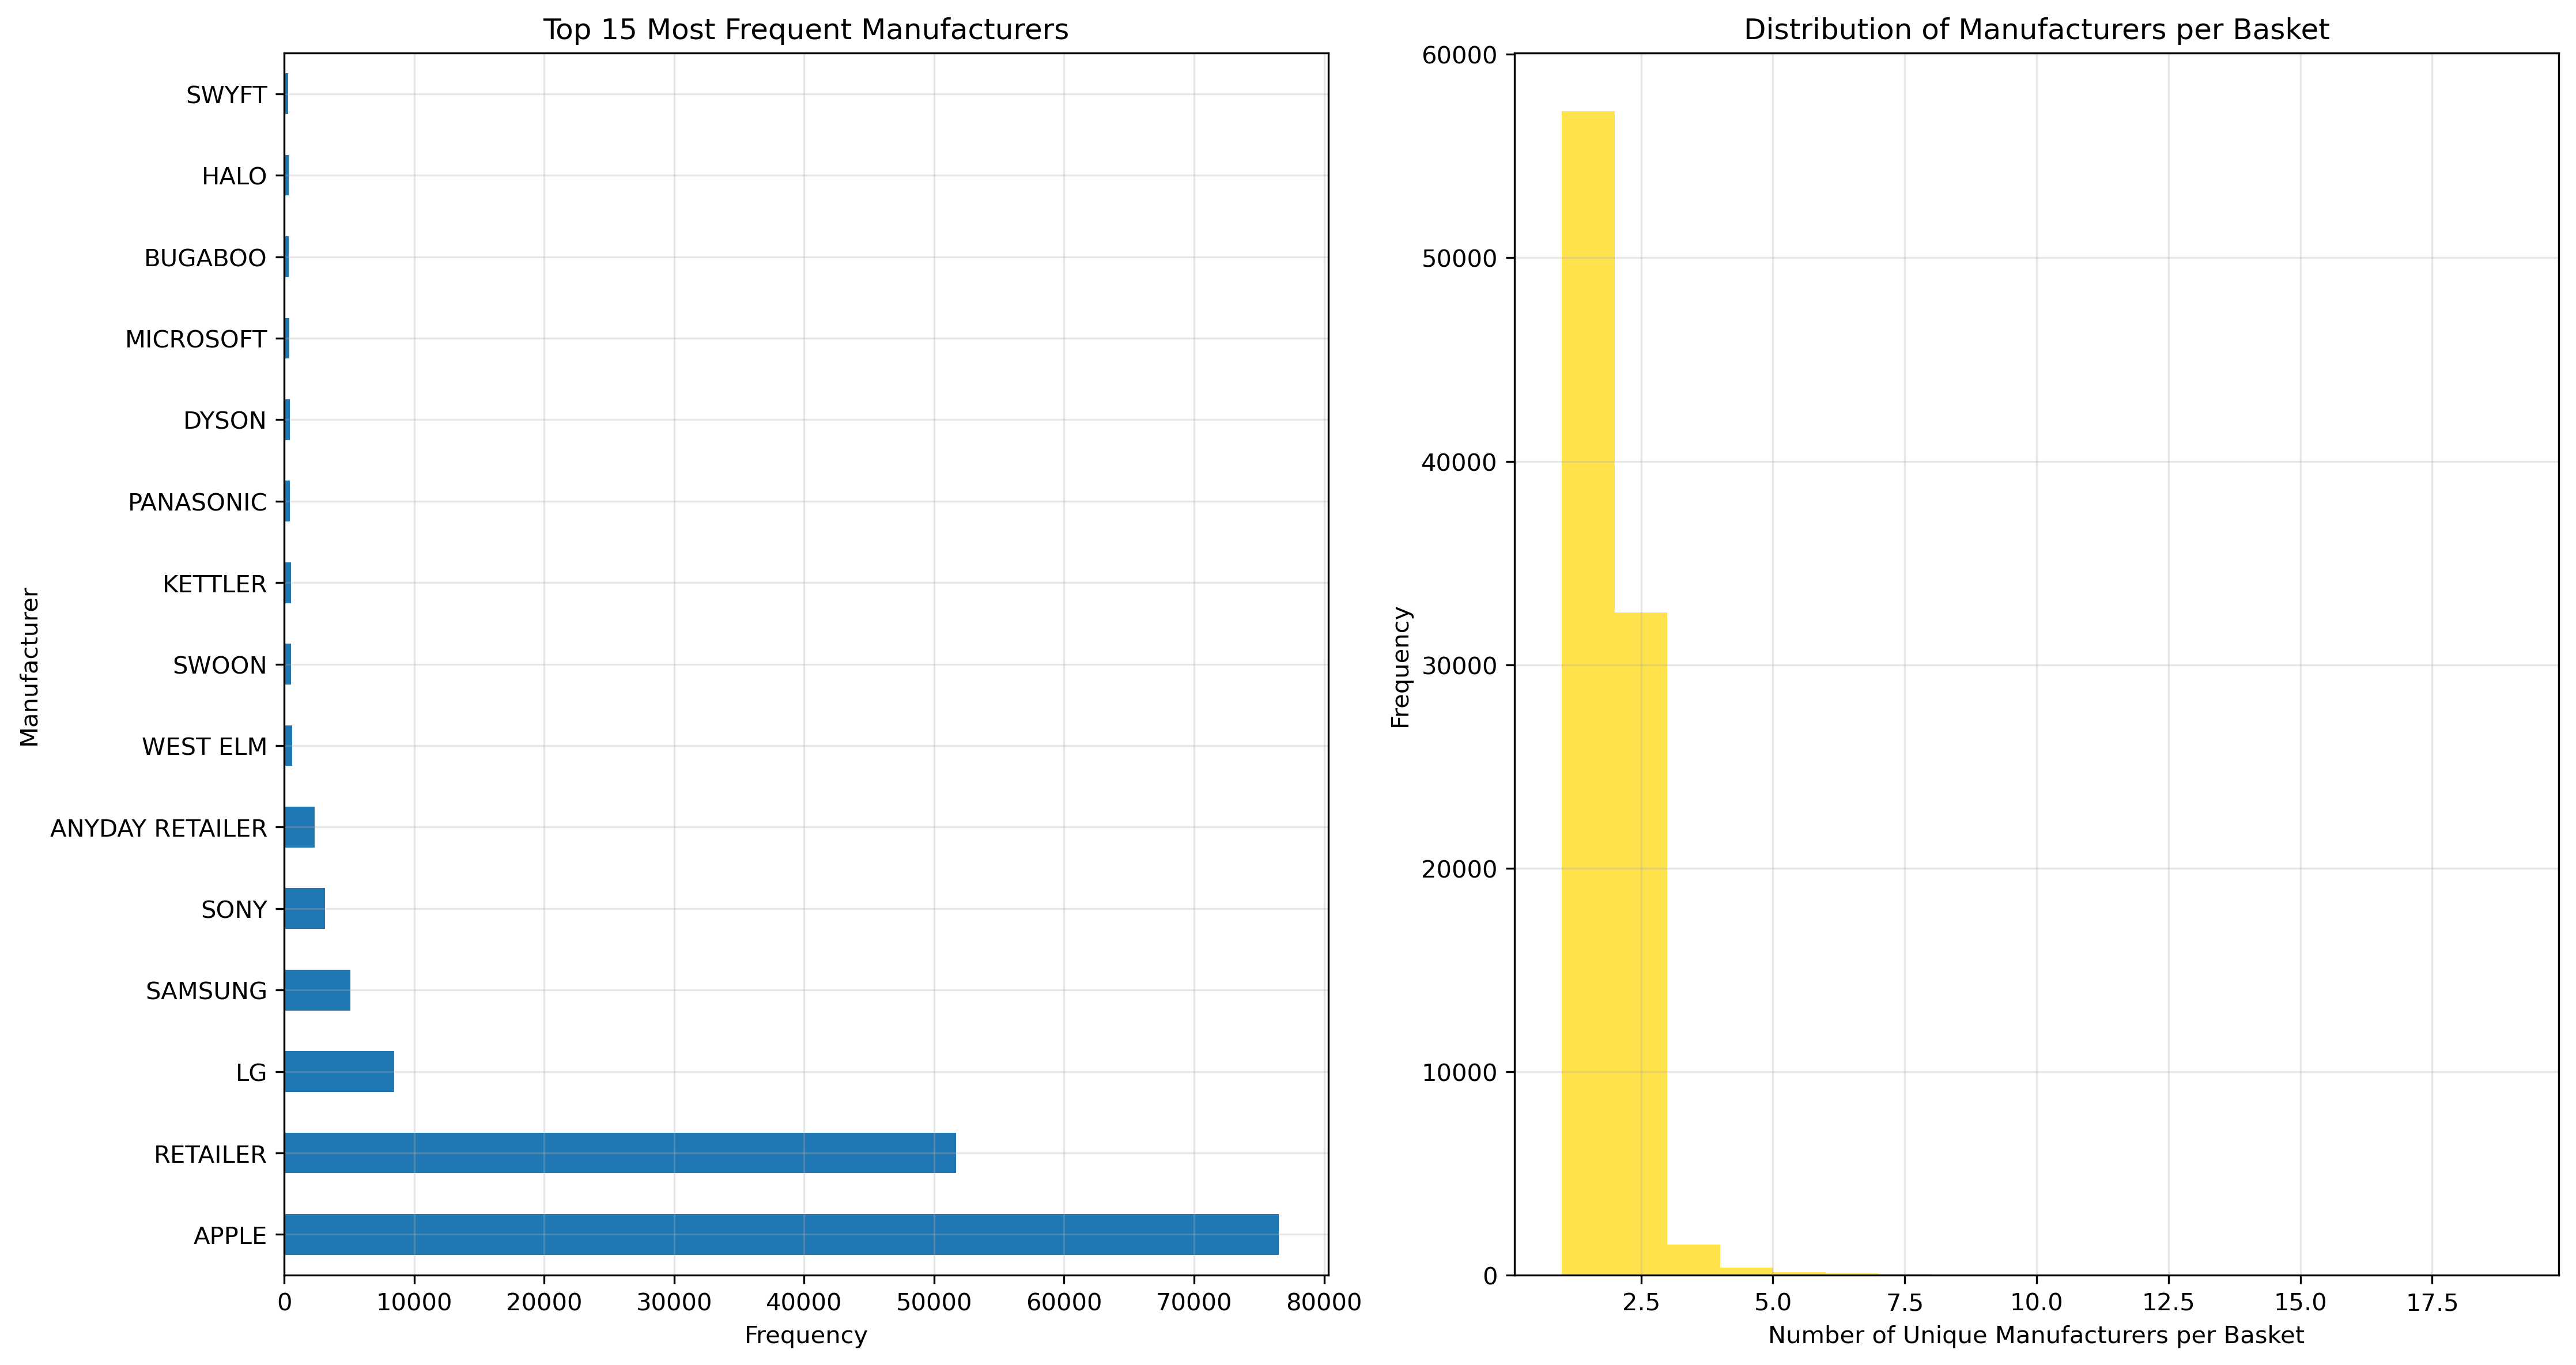

Dataset saved: processed_data/manufacturer_frequency_analysis.csv
Description: Frequency analysis of all manufacturers


In [9]:
# Manufacturer Analysis (MAKE columns)
print("=== MANUFACTURER ANALYSIS ===")
all_makes = []
for col in make_cols:
    makes = train_df[col].dropna()
    all_makes.extend(makes.tolist())

make_counts = pd.Series(all_makes).value_counts()
print(f"\nTotal unique manufacturers: {len(make_counts)}")
print("\nTop 20 most frequent manufacturers:")
print(make_counts.head(20))

# Visualizations for manufacturers
plt.figure(figsize=(15, 8))

plt.subplot(1, 2, 1)
make_counts.head(15).plot(kind="barh")
plt.xlabel("Frequency")
plt.ylabel("Manufacturer")
plt.title("Top 15 Most Frequent Manufacturers")
plt.grid(True, alpha=0.3)

plt.subplot(1, 2, 2)
# Distribution of manufacturers per basket
manufacturers_per_basket = []
for idx, row in train_df.iterrows():
    makes_in_basket = []
    for col in make_cols:
        if pd.notna(row[col]):
            makes_in_basket.append(row[col])
    manufacturers_per_basket.append(len(set(makes_in_basket)))

plt.hist(
    manufacturers_per_basket,
    bins=range(1, max(manufacturers_per_basket) + 2),
    alpha=0.7,
    color="gold",
)
plt.xlabel("Number of Unique Manufacturers per Basket")
plt.ylabel("Frequency")
plt.title("Distribution of Manufacturers per Basket")
plt.grid(True, alpha=0.3)

plt.tight_layout()
save_figure("04_manufacturer_analysis", "Manufacturer Analysis")
plt.show()

# Add manufacturer diversity to training data
train_df["UNIQUE_MANUFACTURERS"] = manufacturers_per_basket

# Save manufacturer analysis data
manufacturer_counts_df = pd.DataFrame(
    {"manufacturer": make_counts.index, "frequency": make_counts.values}
)
save_dataset(
    manufacturer_counts_df,
    "manufacturer_frequency_analysis",
    "Frequency analysis of all manufacturers",
)

=== MODEL ANALYSIS ===

Total unique models: 9679

Top 20 most frequent models:
RETAILER                                              42914
2020 APPLE MACBOOK AIR 13 3 RETINA DISPLAY M1 PROC    13141
2020 APPLE MACBOOK PRO 13 TOUCH BAR M1 PROCESSOR 8     5332
2021 APPLE MACBOOK PRO 14 M1 PRO PROCESSOR 16GB RA     3582
APPLE PENCIL 2ND GENERATION 2018 MATTE WHITE           2880
2020 APPLE IPAD AIR 10 9 A14 BIONIC PROCESSOR IOS      2669
2021 APPLE IMAC 24 ALL-IN-ONE M1 PROCESSOR 8GB RAM     2428
2021 APPLE IPAD PRO 11 M1 PROCESSOR IOS WI-FI 128G     2304
2021 APPLE MACBOOK PRO 16 M1 PRO PROCESSOR 16GB RA     2162
2021 APPLE IPAD PRO 12 9 M1 PROCESSOR IOS WI-FI 25     2123
2020 APPLE MACBOOK AIR                                 2024
2021 APPLE IPAD PRO 12 9 M1 PROCESSOR IOS WI-FI 12     1904
APPLE WATCH SERIES 6                                   1822
LG OLED55C14LB 2021 OLED HDR 4K ULTRA HD SMART TV      1711
APPLE WATCH SERIES 7 GPS 45MM MIDNIGHT ALUMINIUM C     1525
APPLE WATCH SERIES 7

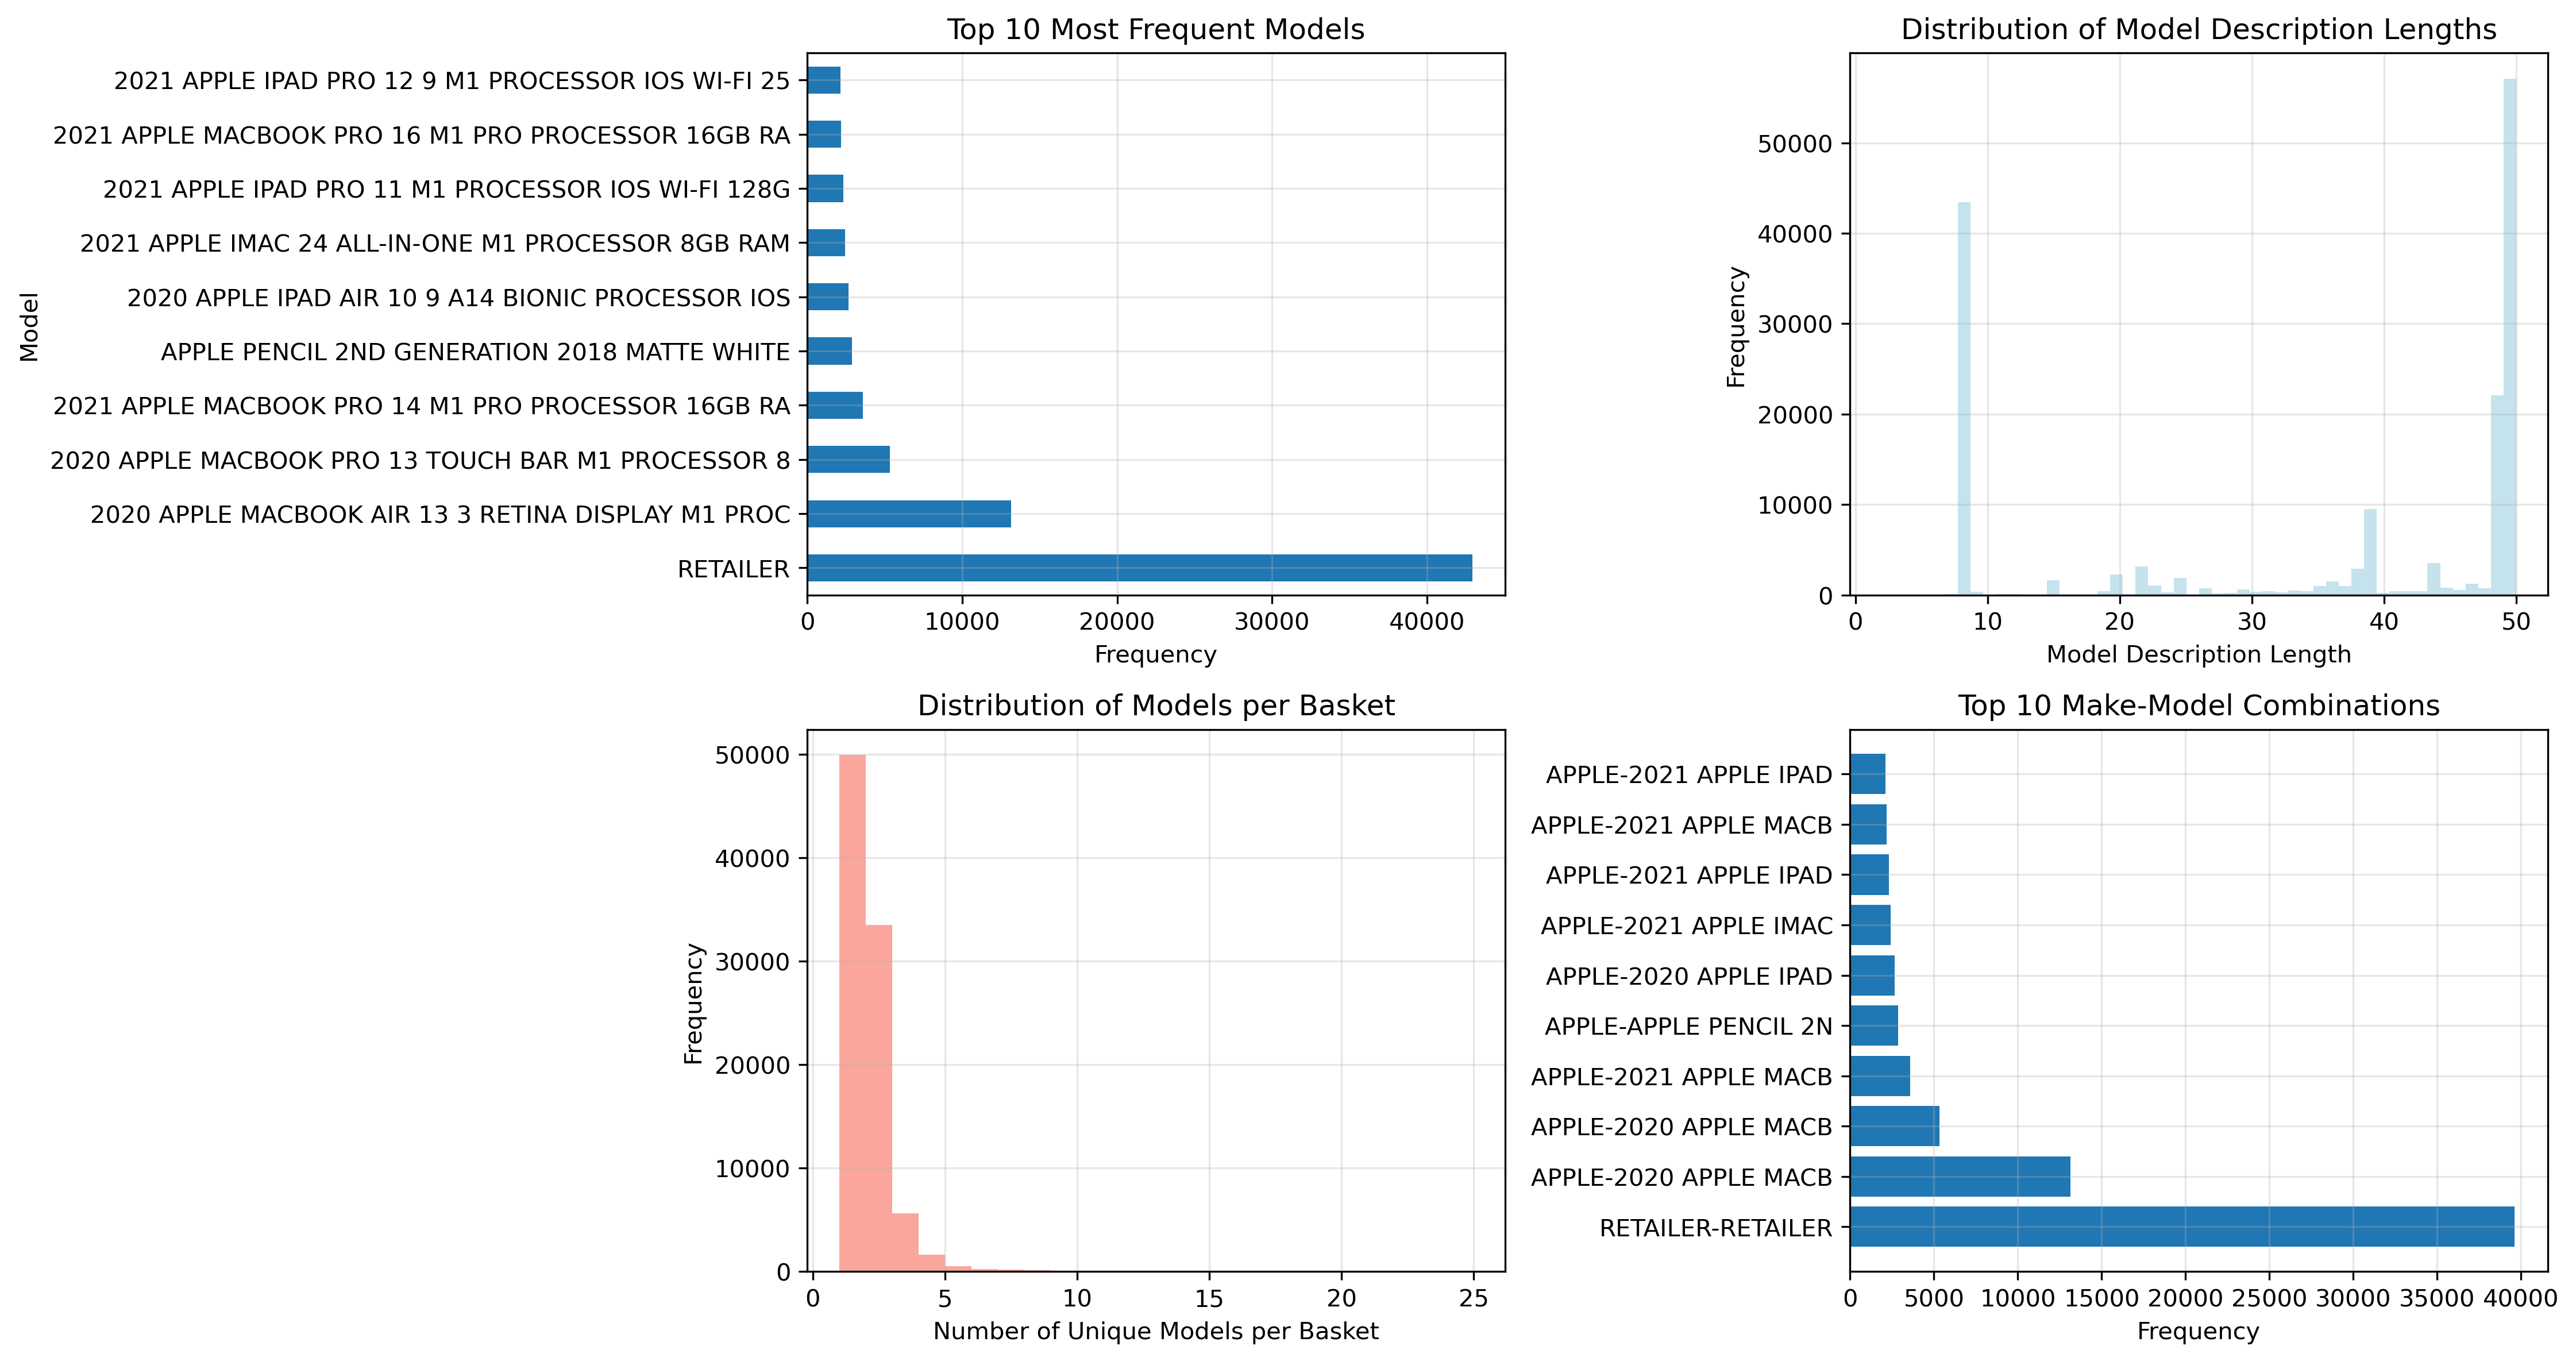

Dataset saved: processed_data/model_frequency_analysis.csv
Description: Frequency and description length analysis of all models
Dataset saved: processed_data/make_model_combinations.csv
Description: Analysis of make-model combinations and their frequencies


In [10]:
# Model Analysis (MODEL columns)
print("=== MODEL ANALYSIS ===")
all_models = []
for col in model_cols:
    models = train_df[col].dropna()
    all_models.extend(models.tolist())

model_counts = pd.Series(all_models).value_counts()
print(f"\nTotal unique models: {len(model_counts)}")
print("\nTop 20 most frequent models:")
print(model_counts.head(20))

# Distribution of model length (text analysis)
model_lengths = [len(str(model)) for model in all_models if pd.notna(model)]
print(f"\nModel description lengths statistics:")
print(pd.Series(model_lengths).describe())

plt.figure(figsize=(15, 8))

plt.subplot(2, 2, 1)
# Most frequent models
model_counts.head(10).plot(kind="barh")
plt.xlabel("Frequency")
plt.ylabel("Model")
plt.title("Top 10 Most Frequent Models")
plt.grid(True, alpha=0.3)

plt.subplot(2, 2, 2)
# Distribution of model description lengths
plt.hist(model_lengths, bins=50, alpha=0.7, color="lightblue")
plt.xlabel("Model Description Length")
plt.ylabel("Frequency")
plt.title("Distribution of Model Description Lengths")
plt.grid(True, alpha=0.3)

plt.subplot(2, 2, 3)
# Models per basket
models_per_basket = []
for idx, row in train_df.iterrows():
    models_in_basket = []
    for col in model_cols:
        if pd.notna(row[col]):
            models_in_basket.append(row[col])
    models_per_basket.append(len(set(models_in_basket)))

plt.hist(
    models_per_basket,
    bins=range(1, max(models_per_basket) + 2),
    alpha=0.7,
    color="salmon",
)
plt.xlabel("Number of Unique Models per Basket")
plt.ylabel("Frequency")
plt.title("Distribution of Models per Basket")
plt.grid(True, alpha=0.3)

plt.subplot(2, 2, 4)
# Relationship between makes and models
make_model_pairs = []
for idx, row in train_df.iterrows():
    for i in range(len(make_cols)):
        if pd.notna(row[make_cols[i]]) and pd.notna(row[model_cols[i]]):
            make_model_pairs.append((row[make_cols[i]], row[model_cols[i]]))

unique_pairs = len(set(make_model_pairs))
print(f"Unique Make-Model pairs: {unique_pairs}")

# Top make-model combinations
from collections import Counter

pair_counts = Counter(make_model_pairs)
top_pairs = dict(pair_counts.most_common(10))
pair_labels = [f"{make[:10]}-{model[:15]}" for (make, model) in top_pairs.keys()]
plt.barh(range(len(top_pairs)), list(top_pairs.values()))
plt.yticks(range(len(top_pairs)), pair_labels)
plt.xlabel("Frequency")
plt.title("Top 10 Make-Model Combinations")
plt.grid(True, alpha=0.3)

plt.tight_layout()
save_figure("05_model_analysis", "Model Analysis")
plt.show()

# Add model diversity to training data
train_df["UNIQUE_MODELS"] = models_per_basket

# Save model analysis data
model_counts_df = pd.DataFrame(
    {
        "model": model_counts.index,
        "frequency": model_counts.values,
        "description_length": [len(str(model)) for model in model_counts.index],
    }
)
save_dataset(
    model_counts_df,
    "model_frequency_analysis",
    "Frequency and description length analysis of all models",
)

# Save make-model pairs analysis
make_model_df = pd.DataFrame(
    {
        "make": [pair[0] for pair in pair_counts.keys()],
        "model": [pair[1] for pair in pair_counts.keys()],
        "frequency": list(pair_counts.values()),
    }
)
save_dataset(
    make_model_df,
    "make_model_combinations",
    "Analysis of make-model combinations and their frequencies",
)

=== GOODS CODE ANALYSIS ===

Total unique goods codes: 17834

Most frequent goods codes:
FULFILMENT    25023
239246776      4574
237841896      2770
239246779      2399
236604736      2202
239246778      2151
239246776      2113
239246782      1687
240575990      1596
236604744      1226
Name: count, dtype: int64

Total unique goods codes: 17834

Most frequent goods codes:
FULFILMENT    25023
239246776      4574
237841896      2770
239246779      2399
236604736      2202
239246778      2151
239246776      2113
239246782      1687
240575990      1596
236604744      1226
Name: count, dtype: int64

Goods code lengths statistics:
count    163357.000000
mean          9.114834
std           0.561432
min           4.000000
25%           9.000000
50%           9.000000
75%           9.000000
max          11.000000
dtype: float64

Goods code lengths statistics:
count    163357.000000
mean          9.114834
std           0.561432
min           4.000000
25%           9.000000
50%           9.0000

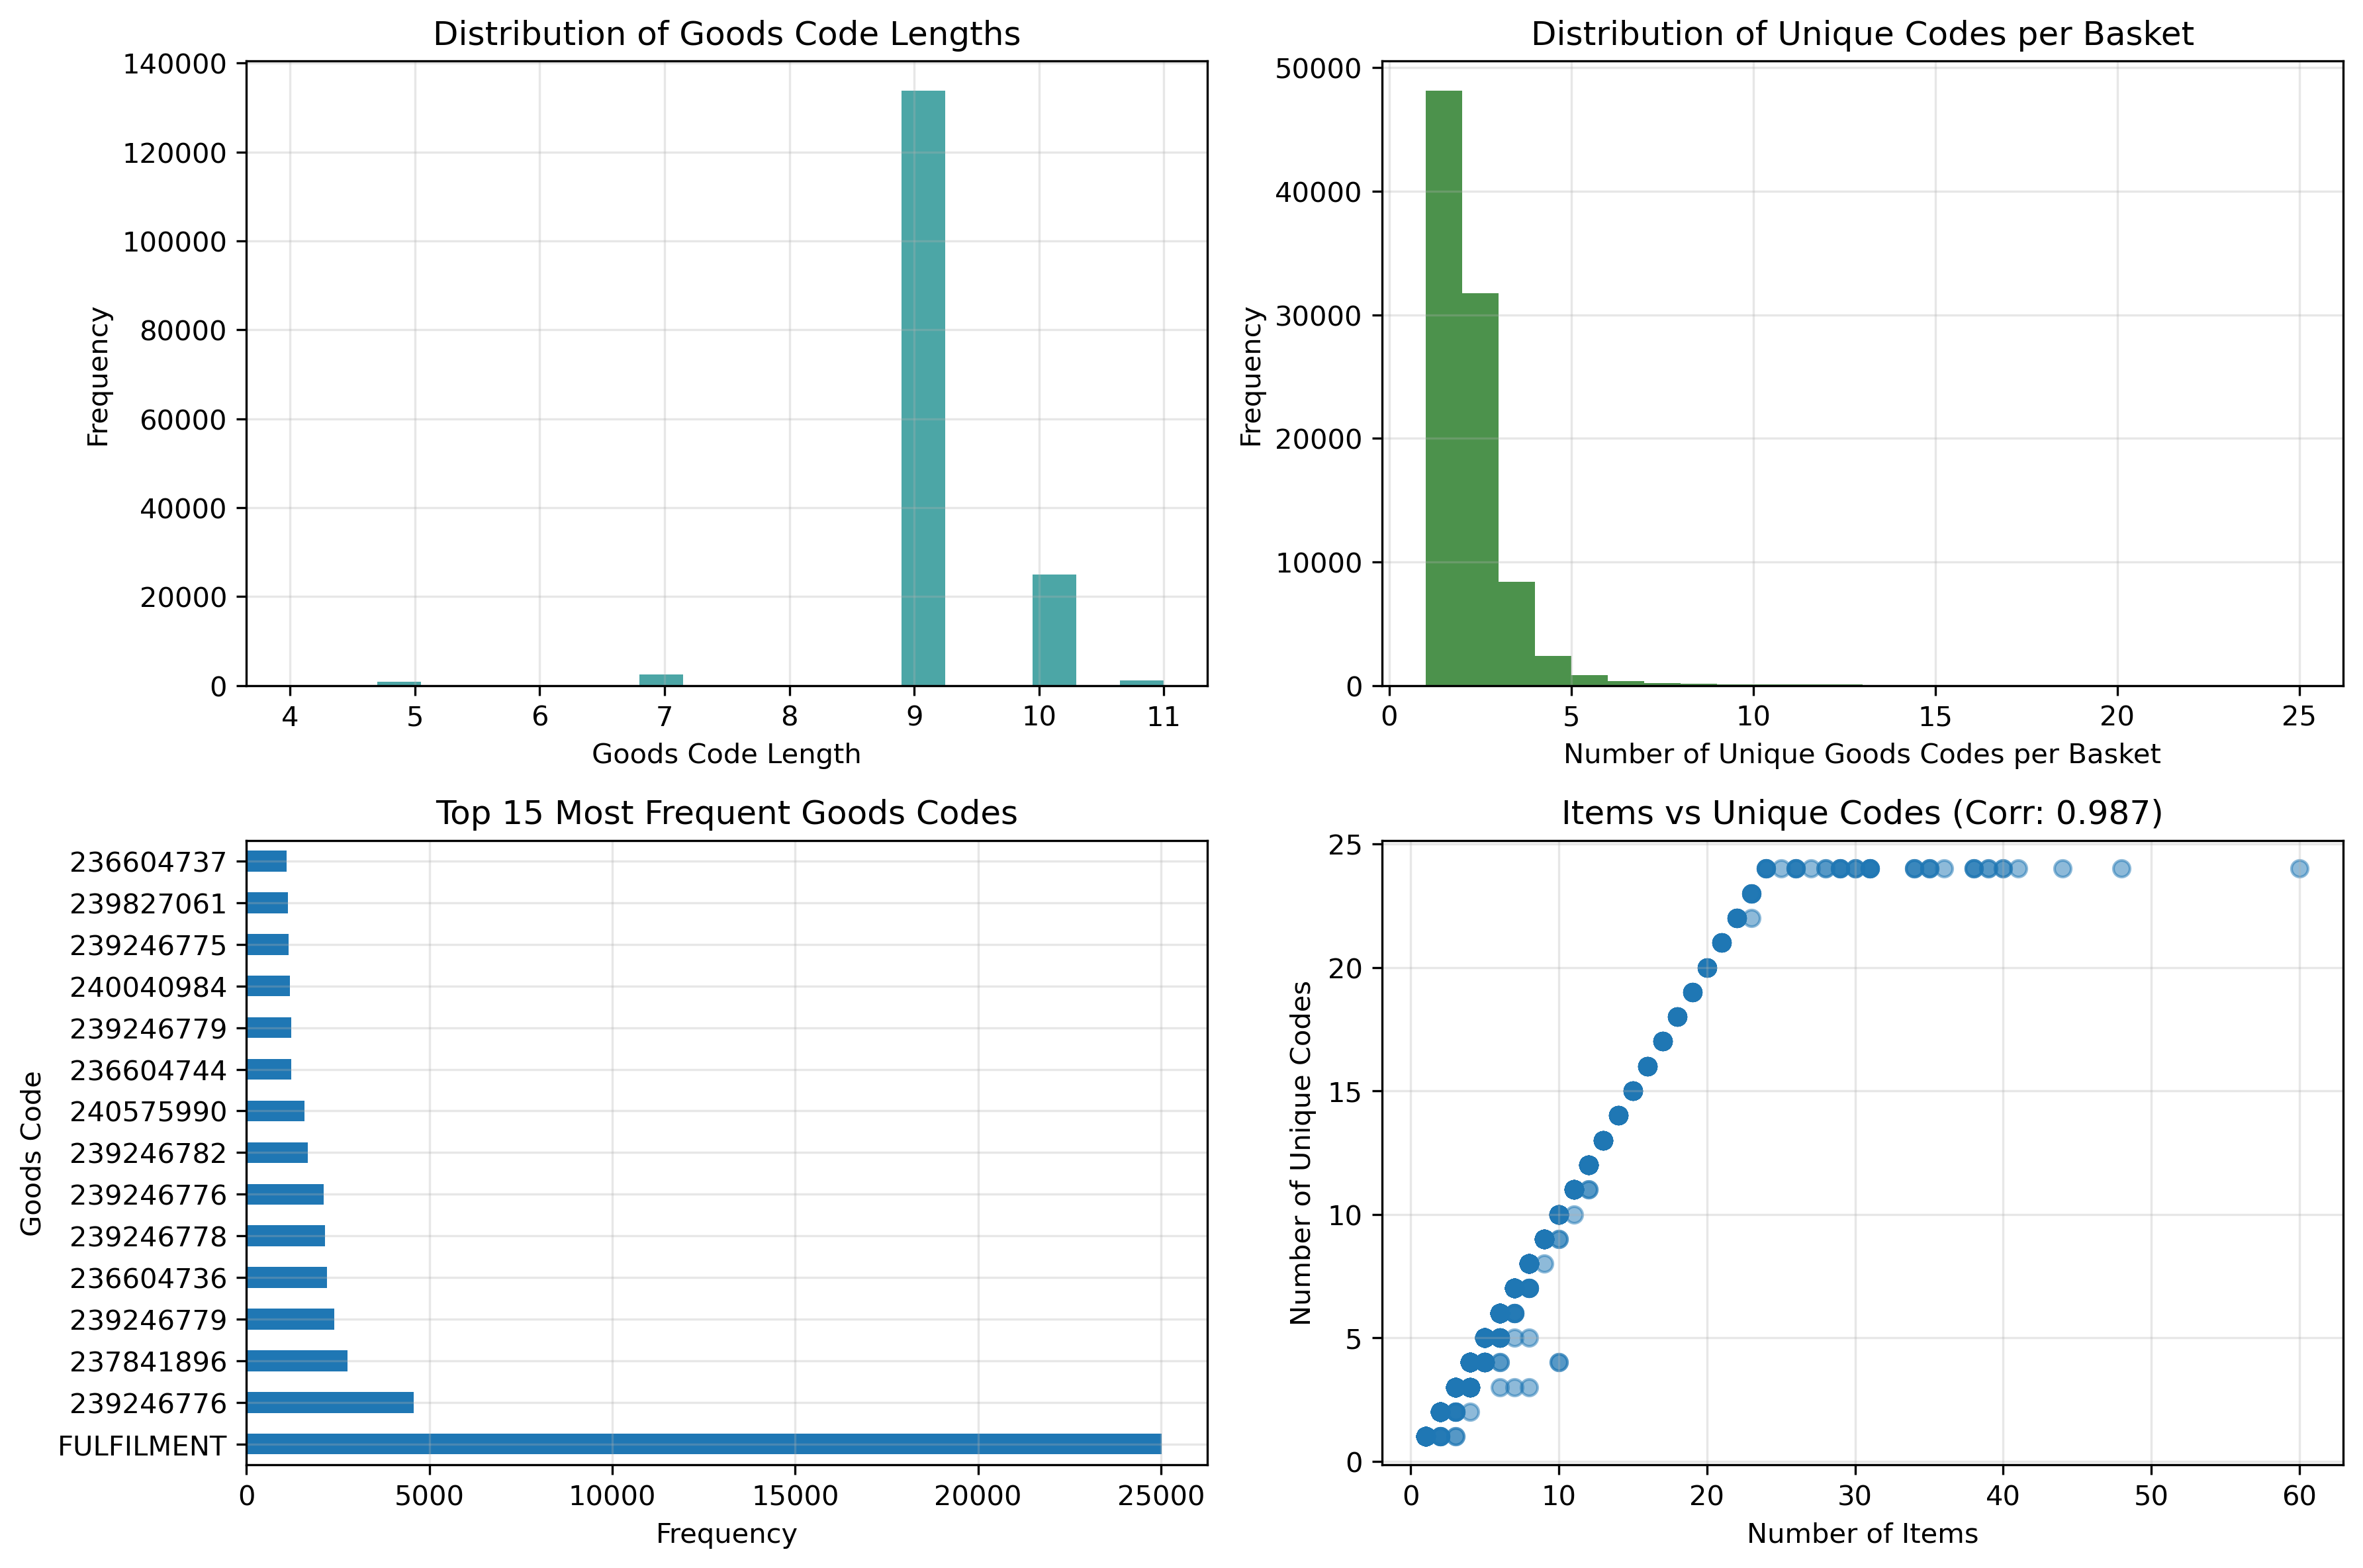

Dataset saved: processed_data/goods_code_analysis.csv
Description: Frequency and length analysis of goods codes
Dataset saved: processed_data/items_vs_codes_correlation.csv
Description: Relationship between number of items and unique goods codes per basket
Dataset saved: processed_data/items_vs_codes_correlation.csv
Description: Relationship between number of items and unique goods codes per basket


In [11]:
# Goods Code Analysis
print("=== GOODS CODE ANALYSIS ===")
all_goods_codes = []
for col in goods_code_cols:
    codes = train_df[col].dropna()
    all_goods_codes.extend(codes.tolist())

goods_code_counts = pd.Series(all_goods_codes).value_counts()
print(f"\nTotal unique goods codes: {len(goods_code_counts)}")
print("\nMost frequent goods codes:")
print(goods_code_counts.head(10))

# Analysis of goods code patterns
code_lengths = [len(str(code)) for code in all_goods_codes if pd.notna(code)]
print(f"\nGoods code lengths statistics:")
print(pd.Series(code_lengths).describe())

plt.figure(figsize=(12, 8))

plt.subplot(2, 2, 1)
plt.hist(code_lengths, bins=20, alpha=0.7, color="teal")
plt.xlabel("Goods Code Length")
plt.ylabel("Frequency")
plt.title("Distribution of Goods Code Lengths")
plt.grid(True, alpha=0.3)

plt.subplot(2, 2, 2)
# Distribution of unique goods codes per basket
unique_codes_per_basket = []
for idx, row in train_df.iterrows():
    codes_in_basket = []
    for col in goods_code_cols:
        if pd.notna(row[col]):
            codes_in_basket.append(row[col])
    unique_codes_per_basket.append(len(set(codes_in_basket)))

plt.hist(
    unique_codes_per_basket,
    bins=range(1, max(unique_codes_per_basket) + 2),
    alpha=0.7,
    color="darkgreen",
)
plt.xlabel("Number of Unique Goods Codes per Basket")
plt.ylabel("Frequency")
plt.title("Distribution of Unique Codes per Basket")
plt.grid(True, alpha=0.3)

plt.subplot(2, 2, 3)
# Most frequent goods codes
goods_code_counts.head(15).plot(kind="barh")
plt.xlabel("Frequency")
plt.ylabel("Goods Code")
plt.title("Top 15 Most Frequent Goods Codes")
plt.grid(True, alpha=0.3)

plt.subplot(2, 2, 4)
# Relationship between number of items and unique codes
items_vs_codes = pd.DataFrame(
    {"Nb_of_items": train_df["Nb_of_items"], "UNIQUE_CODES": unique_codes_per_basket}
)
correlation = items_vs_codes.corr().iloc[0, 1]
plt.scatter(items_vs_codes["Nb_of_items"], items_vs_codes["UNIQUE_CODES"], alpha=0.5)
plt.xlabel("Number of Items")
plt.ylabel("Number of Unique Codes")
plt.title(f"Items vs Unique Codes (Corr: {correlation:.3f})")
plt.grid(True, alpha=0.3)

plt.tight_layout()
save_figure("06_goods_code_analysis", "Goods Code Analysis")
plt.show()

# Add unique codes per basket to training data
train_df["UNIQUE_CODES"] = unique_codes_per_basket

# Save goods code analysis data
goods_code_df = pd.DataFrame(
    {
        "goods_code": goods_code_counts.index,
        "frequency": goods_code_counts.values,
        "code_length": [len(str(code)) for code in goods_code_counts.index],
    }
)
save_dataset(
    goods_code_df, "goods_code_analysis", "Frequency and length analysis of goods codes"
)

# Save correlation analysis
correlation_df = pd.DataFrame(
    {"nb_items": train_df["Nb_of_items"], "unique_codes": unique_codes_per_basket}
)
save_dataset(
    correlation_df,
    "items_vs_codes_correlation",
    "Relationship between number of items and unique goods codes per basket",
)

=== PRODUCT QUANTITY ANALYSIS ===

Product quantities statistics:
count    163357.000000
mean          1.053031
std           0.427394
min           1.000000
25%           1.000000
50%           1.000000
75%           1.000000
max          40.000000
dtype: float64count    163357.000000
mean          1.053031
std           0.427394
min           1.000000
25%           1.000000
50%           1.000000
75%           1.000000
max          40.000000
dtype: float64

Quantity value counts (top 20):
1.0     157909
2.0       4218
4.0        474
3.0        422
6.0        158
5.0         57
8.0         47
7.0         19
10.0        12
12.0        11
9.0          8
16.0         7
14.0         3
15.0         3
18.0         2
30.0         2
24.0         2
40.0         1
36.0         1
28.0         1
Name: count, dtype: int64

Total products per basket statistics:


Quantity value counts (top 20):
1.0     157909
2.0       4218
4.0        474
3.0        422
6.0        158
5.0         57
8.0         47


Figure saved: figures/07_quantity_analysis_product_quantity_analysis.png


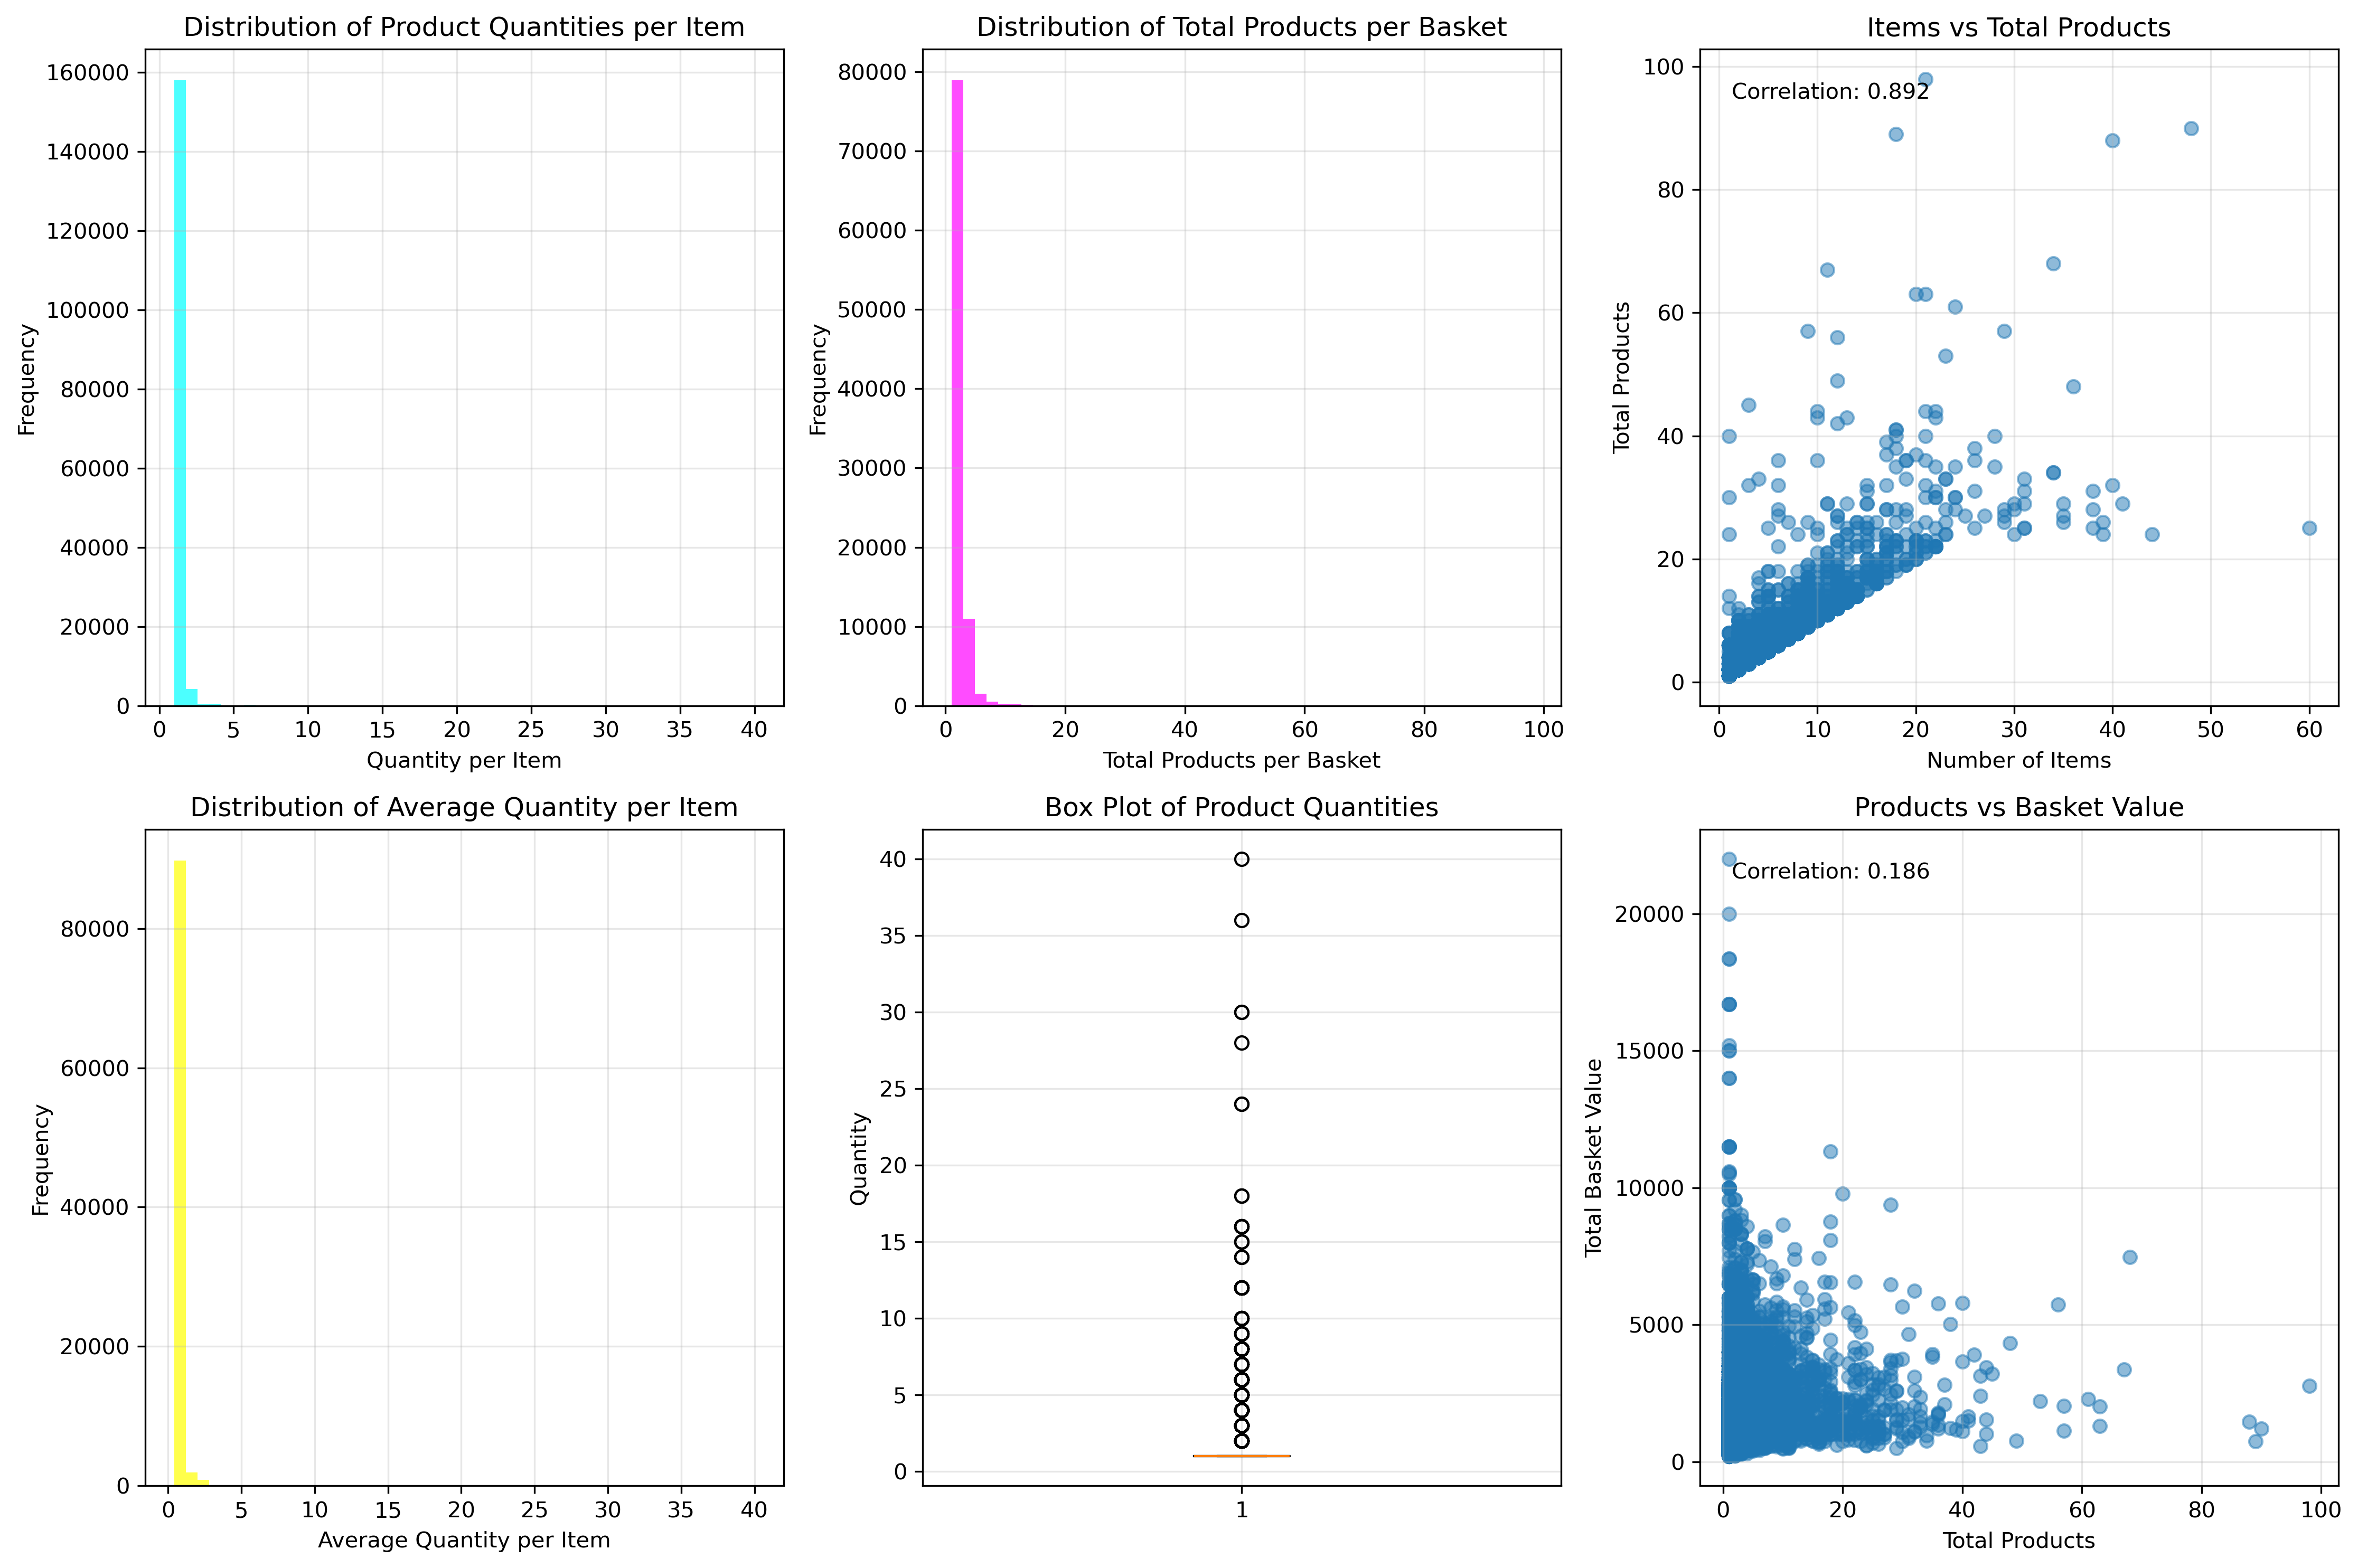

Dataset saved: processed_data/individual_quantities.csv
Description: All individual product quantities from training data
Dataset saved: processed_data/quantity_correlations.csv
Description: Correlations between quantities, items, and basket values


In [12]:
# Product Quantity Analysis (NBR_OF_PROD_PURCHAS columns)
print("=== PRODUCT QUANTITY ANALYSIS ===")
all_quantities = []
for col in nbr_prod_cols:
    quantities = train_df[col].dropna()
    all_quantities.extend(quantities.tolist())

quantity_series = pd.Series(all_quantities)
print(f"\nProduct quantities statistics:")
print(quantity_series.describe())
print(f"\nQuantity value counts (top 20):")
print(quantity_series.value_counts().head(20))

# Calculate total products per basket
train_df["TOTAL_PRODUCTS"] = train_df[nbr_prod_cols].sum(axis=1)
test_df["TOTAL_PRODUCTS"] = test_df[nbr_prod_cols].sum(axis=1)

print(f"\nTotal products per basket statistics:")
print(train_df["TOTAL_PRODUCTS"].describe())

plt.figure(figsize=(15, 10))

plt.subplot(2, 3, 1)
plt.hist(all_quantities, bins=50, alpha=0.7, color="cyan")
plt.xlabel("Quantity per Item")
plt.ylabel("Frequency")
plt.title("Distribution of Product Quantities per Item")
plt.grid(True, alpha=0.3)

plt.subplot(2, 3, 2)
plt.hist(train_df["TOTAL_PRODUCTS"], bins=50, alpha=0.7, color="magenta")
plt.xlabel("Total Products per Basket")
plt.ylabel("Frequency")
plt.title("Distribution of Total Products per Basket")
plt.grid(True, alpha=0.3)

plt.subplot(2, 3, 3)
plt.scatter(train_df["Nb_of_items"], train_df["TOTAL_PRODUCTS"], alpha=0.5)
plt.xlabel("Number of Items")
plt.ylabel("Total Products")
plt.title("Items vs Total Products")
correlation_items_products = (
    train_df[["Nb_of_items", "TOTAL_PRODUCTS"]].corr().iloc[0, 1]
)
plt.text(
    0.05,
    0.95,
    f"Correlation: {correlation_items_products:.3f}",
    transform=plt.gca().transAxes,
    verticalalignment="top",
)
plt.grid(True, alpha=0.3)

plt.subplot(2, 3, 4)
# Average quantity per item in each basket
avg_qty_per_item = train_df["TOTAL_PRODUCTS"] / train_df["Nb_of_items"]
plt.hist(avg_qty_per_item, bins=50, alpha=0.7, color="yellow")
plt.xlabel("Average Quantity per Item")
plt.ylabel("Frequency")
plt.title("Distribution of Average Quantity per Item")
plt.grid(True, alpha=0.3)

plt.subplot(2, 3, 5)
# Box plot of quantities
plt.boxplot(all_quantities)
plt.ylabel("Quantity")
plt.title("Box Plot of Product Quantities")
plt.grid(True, alpha=0.3)

plt.subplot(2, 3, 6)
# Relationship between basket value and total products
plt.scatter(train_df["TOTAL_PRODUCTS"], train_df["TOTAL_BASKET_VALUE"], alpha=0.5)
plt.xlabel("Total Products")
plt.ylabel("Total Basket Value")
plt.title("Products vs Basket Value")
correlation_products_value = (
    train_df[["TOTAL_PRODUCTS", "TOTAL_BASKET_VALUE"]].corr().iloc[0, 1]
)
plt.text(
    0.05,
    0.95,
    f"Correlation: {correlation_products_value:.3f}",
    transform=plt.gca().transAxes,
    verticalalignment="top",
)
plt.grid(True, alpha=0.3)

plt.tight_layout()
save_figure("07_quantity_analysis", "Product Quantity Analysis")
plt.show()

# Add average quantity per item to training data
train_df["AVG_QTY_PER_ITEM"] = avg_qty_per_item

# Save quantity analysis data
quantity_stats_df = pd.DataFrame({"quantity": all_quantities})
save_dataset(
    quantity_stats_df,
    "individual_quantities",
    "All individual product quantities from training data",
)

# Save quantity correlations
quantity_correlations_df = pd.DataFrame(
    {
        "nb_items": train_df["Nb_of_items"],
        "total_products": train_df["TOTAL_PRODUCTS"],
        "avg_qty_per_item": train_df["AVG_QTY_PER_ITEM"],
        "total_basket_value": train_df["TOTAL_BASKET_VALUE"],
    }
)
save_dataset(
    quantity_correlations_df,
    "quantity_correlations",
    "Correlations between quantities, items, and basket values",
)

=== OUTLIER AND ANOMALY ANALYSIS ===
Price outliers: 4897 baskets (5.28%)
Quantity outliers: 5508 baskets (5.94%)
High item count outliers (>95th percentile): 4562 baskets
Price outliers: 4897 baskets (5.28%)
Quantity outliers: 5508 baskets (5.94%)
High item count outliers (>95th percentile): 4562 baskets
Figure saved: figures/08_outlier_analysis_outlier_detection_and_anomaly_analysis.png
Figure saved: figures/08_outlier_analysis_outlier_detection_and_anomaly_analysis.png


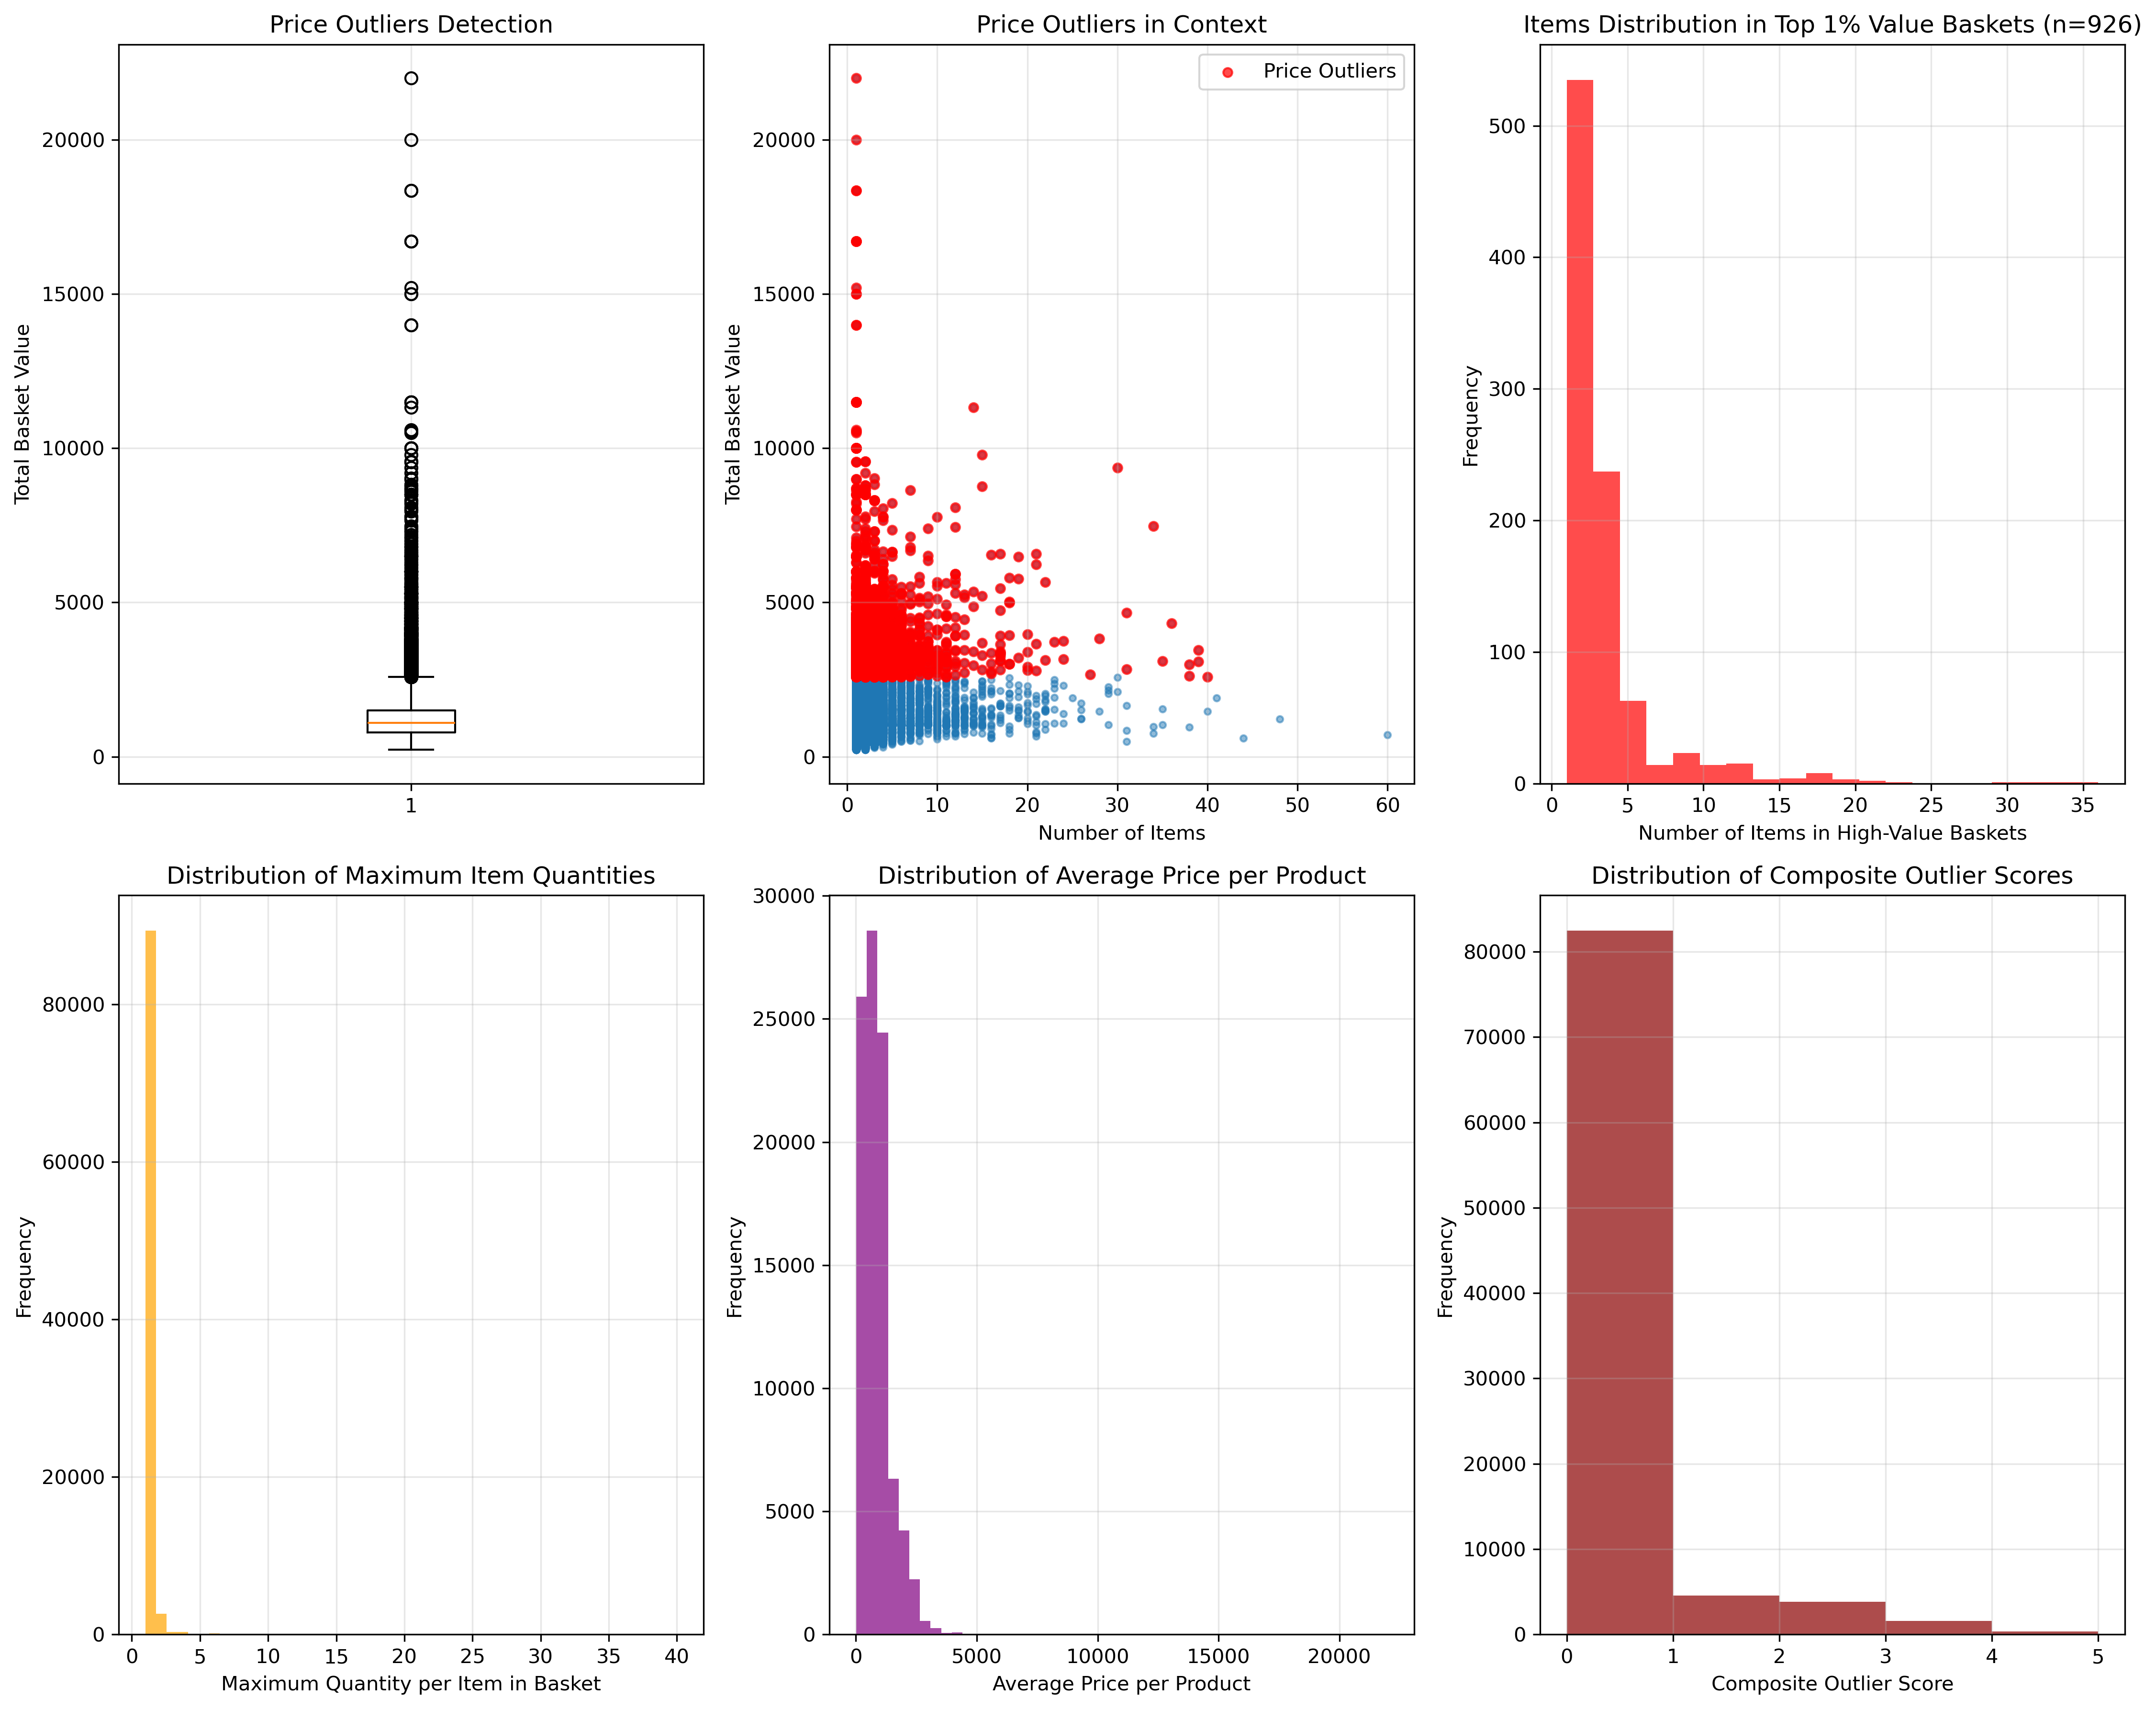


Composite outlier score distribution:
TOTAL_BASKET_VALUE
0.0    82476
1.0     4531
2.0     3819
3.0     1600
4.0      364
Name: count, dtype: int64

Top 10 highest value baskets:
           ID  Nb_of_items  TOTAL_BASKET_VALUE  TOTAL_PRODUCTS
50402  108196          1.0             21995.0             1.0
53012   80647          1.0             19999.0             1.0
68546   26199          1.0             18349.0             1.0
82818   74814          1.0             18349.0             1.0
44406  104956          1.0             16699.0             1.0
79968   99779          1.0             16699.0             1.0
84880  100195          1.0             16699.0             1.0
12827   60803          1.0             15199.0             1.0
12910  108614          1.0             14999.0             1.0
21704  103539          1.0             14999.0             1.0

Top 10 highest quantity baskets:
           ID  Nb_of_items  TOTAL_BASKET_VALUE  TOTAL_PRODUCTS
50402  108196          1.0    

In [13]:
# Outlier Detection and Anomaly Analysis
print("=== OUTLIER AND ANOMALY ANALYSIS ===")

# Price-based outliers
Q1_price = train_df["TOTAL_BASKET_VALUE"].quantile(0.25)
Q3_price = train_df["TOTAL_BASKET_VALUE"].quantile(0.75)
IQR_price = Q3_price - Q1_price
lower_bound_price = Q1_price - 1.5 * IQR_price
upper_bound_price = Q3_price + 1.5 * IQR_price

price_outliers = train_df[
    (train_df["TOTAL_BASKET_VALUE"] < lower_bound_price)
    | (train_df["TOTAL_BASKET_VALUE"] > upper_bound_price)
]
print(
    f"Price outliers: {len(price_outliers)} baskets ({len(price_outliers) / len(train_df) * 100:.2f}%)"
)

# Quantity-based outliers
Q1_qty = train_df["TOTAL_PRODUCTS"].quantile(0.25)
Q3_qty = train_df["TOTAL_PRODUCTS"].quantile(0.75)
IQR_qty = Q3_qty - Q1_qty
lower_bound_qty = Q1_qty - 1.5 * IQR_qty
upper_bound_qty = Q3_qty + 1.5 * IQR_qty

qty_outliers = train_df[
    (train_df["TOTAL_PRODUCTS"] < lower_bound_qty)
    | (train_df["TOTAL_PRODUCTS"] > upper_bound_qty)
]
print(
    f"Quantity outliers: {len(qty_outliers)} baskets ({len(qty_outliers) / len(train_df) * 100:.2f}%)"
)

# Items-based outliers
items_outliers = train_df[
    train_df["Nb_of_items"] > train_df["Nb_of_items"].quantile(0.95)
]
print(f"High item count outliers (>95th percentile): {len(items_outliers)} baskets")

plt.figure(figsize=(15, 12))

plt.subplot(2, 3, 1)
# Box plot highlighting outliers
plt.boxplot([train_df["TOTAL_BASKET_VALUE"]])
plt.ylabel("Total Basket Value")
plt.title("Price Outliers Detection")
plt.grid(True, alpha=0.3)

plt.subplot(2, 3, 2)
# Scatter plot of potential anomalies
plt.scatter(train_df["Nb_of_items"], train_df["TOTAL_BASKET_VALUE"], alpha=0.5, s=10)
plt.scatter(
    price_outliers["Nb_of_items"],
    price_outliers["TOTAL_BASKET_VALUE"],
    color="red",
    alpha=0.7,
    s=20,
    label="Price Outliers",
)
plt.xlabel("Number of Items")
plt.ylabel("Total Basket Value")
plt.title("Price Outliers in Context")
plt.legend()
plt.grid(True, alpha=0.3)

plt.subplot(2, 3, 3)
# High-value baskets analysis
high_value_threshold = train_df["TOTAL_BASKET_VALUE"].quantile(0.99)
high_value_baskets = train_df[train_df["TOTAL_BASKET_VALUE"] > high_value_threshold]
plt.hist(high_value_baskets["Nb_of_items"], bins=20, alpha=0.7, color="red")
plt.xlabel("Number of Items in High-Value Baskets")
plt.ylabel("Frequency")
plt.title(f"Items Distribution in Top 1% Value Baskets (n={len(high_value_baskets)})")
plt.grid(True, alpha=0.3)

plt.subplot(2, 3, 4)
# Unusual quantity patterns
max_qty_per_basket = []
for idx, row in train_df.iterrows():
    quantities = [row[col] for col in nbr_prod_cols if pd.notna(row[col])]
    if quantities:
        max_qty_per_basket.append(max(quantities))
    else:
        max_qty_per_basket.append(0)

train_df["MAX_QTY_PER_ITEM"] = max_qty_per_basket
plt.hist(train_df["MAX_QTY_PER_ITEM"], bins=50, alpha=0.7, color="orange")
plt.xlabel("Maximum Quantity per Item in Basket")
plt.ylabel("Frequency")
plt.title("Distribution of Maximum Item Quantities")
plt.grid(True, alpha=0.3)

plt.subplot(2, 3, 5)
# Price per product analysis
train_df["AVG_PRICE_PER_PRODUCT"] = (
    train_df["TOTAL_BASKET_VALUE"] / train_df["TOTAL_PRODUCTS"]
)
train_df["AVG_PRICE_PER_PRODUCT"] = train_df["AVG_PRICE_PER_PRODUCT"].replace(
    [np.inf, -np.inf], np.nan
)
plt.hist(train_df["AVG_PRICE_PER_PRODUCT"].dropna(), bins=50, alpha=0.7, color="purple")
plt.xlabel("Average Price per Product")
plt.ylabel("Frequency")
plt.title("Distribution of Average Price per Product")
plt.grid(True, alpha=0.3)

plt.subplot(2, 3, 6)
# Combining multiple outlier indicators
outlier_score = np.zeros(len(train_df))
outlier_score += (train_df["TOTAL_BASKET_VALUE"] > upper_bound_price).astype(int)
outlier_score += (train_df["TOTAL_PRODUCTS"] > upper_bound_qty).astype(int)
outlier_score += (
    train_df["Nb_of_items"] > train_df["Nb_of_items"].quantile(0.95)
).astype(int)
outlier_score += (
    train_df["MAX_QTY_PER_ITEM"] > train_df["MAX_QTY_PER_ITEM"].quantile(0.95)
).astype(int)

plt.hist(outlier_score, bins=range(6), alpha=0.7, color="darkred")
plt.xlabel("Composite Outlier Score")
plt.ylabel("Frequency")
plt.title("Distribution of Composite Outlier Scores")
plt.grid(True, alpha=0.3)

plt.tight_layout()
save_figure("08_outlier_analysis", "Outlier Detection and Anomaly Analysis")
plt.show()

print(f"\nComposite outlier score distribution:")
print(pd.Series(outlier_score).value_counts().sort_index())

# Show some extreme cases
print(f"\nTop 10 highest value baskets:")
print(
    train_df.nlargest(10, "TOTAL_BASKET_VALUE")[
        ["ID", "Nb_of_items", "TOTAL_BASKET_VALUE", "TOTAL_PRODUCTS"]
    ].to_string()
)

print(f"\nTop 10 highest quantity baskets:")
print(
    train_df.nlargest(10, "TOTAL_PRODUCTS")[
        ["ID", "Nb_of_items", "TOTAL_BASKET_VALUE", "TOTAL_PRODUCTS"]
    ].to_string()
)

# Add outlier scores to training data
train_df["COMPOSITE_OUTLIER_SCORE"] = outlier_score
train_df["IS_PRICE_OUTLIER"] = (
    (train_df["TOTAL_BASKET_VALUE"] < lower_bound_price)
    | (train_df["TOTAL_BASKET_VALUE"] > upper_bound_price)
).astype(int)
train_df["IS_QTY_OUTLIER"] = (
    (train_df["TOTAL_PRODUCTS"] < lower_bound_qty)
    | (train_df["TOTAL_PRODUCTS"] > upper_bound_qty)
).astype(int)
train_df["IS_HIGH_ITEMS_OUTLIER"] = (
    train_df["Nb_of_items"] > train_df["Nb_of_items"].quantile(0.95)
).astype(int)

# Save outlier analysis data
outlier_summary_df = pd.DataFrame(
    {
        "outlier_type": ["Price_Outliers", "Quantity_Outliers", "High_Items_Outliers"],
        "count": [len(price_outliers), len(qty_outliers), len(items_outliers)],
        "percentage": [
            len(price_outliers) / len(train_df) * 100,
            len(qty_outliers) / len(train_df) * 100,
            len(items_outliers) / len(train_df) * 100,
        ],
    }
)
save_dataset(
    outlier_summary_df,
    "outlier_summary",
    "Summary of different types of outliers detected",
)

# Save detailed outlier information
price_outliers_detailed = price_outliers[
    ["ID", "Nb_of_items", "TOTAL_BASKET_VALUE", "TOTAL_PRODUCTS"]
].copy()
price_outliers_detailed["outlier_type"] = "price"
save_dataset(
    price_outliers_detailed,
    "price_outliers_detailed",
    "Detailed information about price outliers",
)

high_value_baskets_detailed = high_value_baskets[
    ["ID", "Nb_of_items", "TOTAL_BASKET_VALUE", "TOTAL_PRODUCTS"]
].copy()
save_dataset(
    high_value_baskets_detailed, "high_value_baskets", "Top 1% highest value baskets"
)

## Summary and Key Insights for Fraud Detection

Based on the exploratory data analysis, here are the key findings that could help identify anomalous shopping baskets:

### Data Structure

- **Dataset Size**: 92,790 training samples and 23,198 test samples
- **Feature Structure**: Each basket can contain up to 24 items with 6 attributes per item
- **Missing Values**: Significant missing values due to variable basket sizes

### Potential Anomaly Indicators

1. **Extreme Basket Values**: Very high or low total basket values
2. **Unusual Quantity Patterns**: Items with abnormally high quantities
3. **Item Diversity**: Baskets with unusual item category combinations
4. **Price-Quantity Mismatches**: High quantities of expensive items or vice versa
5. **Rare Item Combinations**: Uncommon make-model combinations

### Key Distributions

- **Items per Basket**: Most baskets have 1-10 items
- **Price Distribution**: Right-skewed with potential high-value outliers
- **Product Quantities**: Most items have quantity 1, outliers exist
- **Category Diversity**: Varies significantly across baskets

### Recommendations for Anomaly Detection

1. Focus on composite outlier scores combining multiple indicators
2. Consider item category co-occurrence patterns
3. Analyze price-to-quantity ratios
4. Investigate rare manufacturer-model combinations
5. Use basket value percentiles for thresholding


=== TRAIN VS TEST DATA COMPARISON ===
Training vs Test Data Comparison:
                     Train         Test
Items_Mean        1.764479     1.774808
Value_Mean     1234.759554  1249.133805
Products_Mean     1.853864     1.863954
Items_Std         1.462264     1.498711
Value_Std       771.484197   794.702057
Products_Std      1.981476     1.883747


/tmp/ipykernel_294448/210116985.py:72: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(data_to_plot, labels=["Train", "Test"])
/tmp/ipykernel_294448/210116985.py:79: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(data_to_plot, labels=["Train", "Test"])
/tmp/ipykernel_294448/210116985.py:86: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(data_to_plot, labels=["Train", "Test"])


Figure saved: figures/09_train_vs_test_comparison_training_vs_test_data_comparison.png


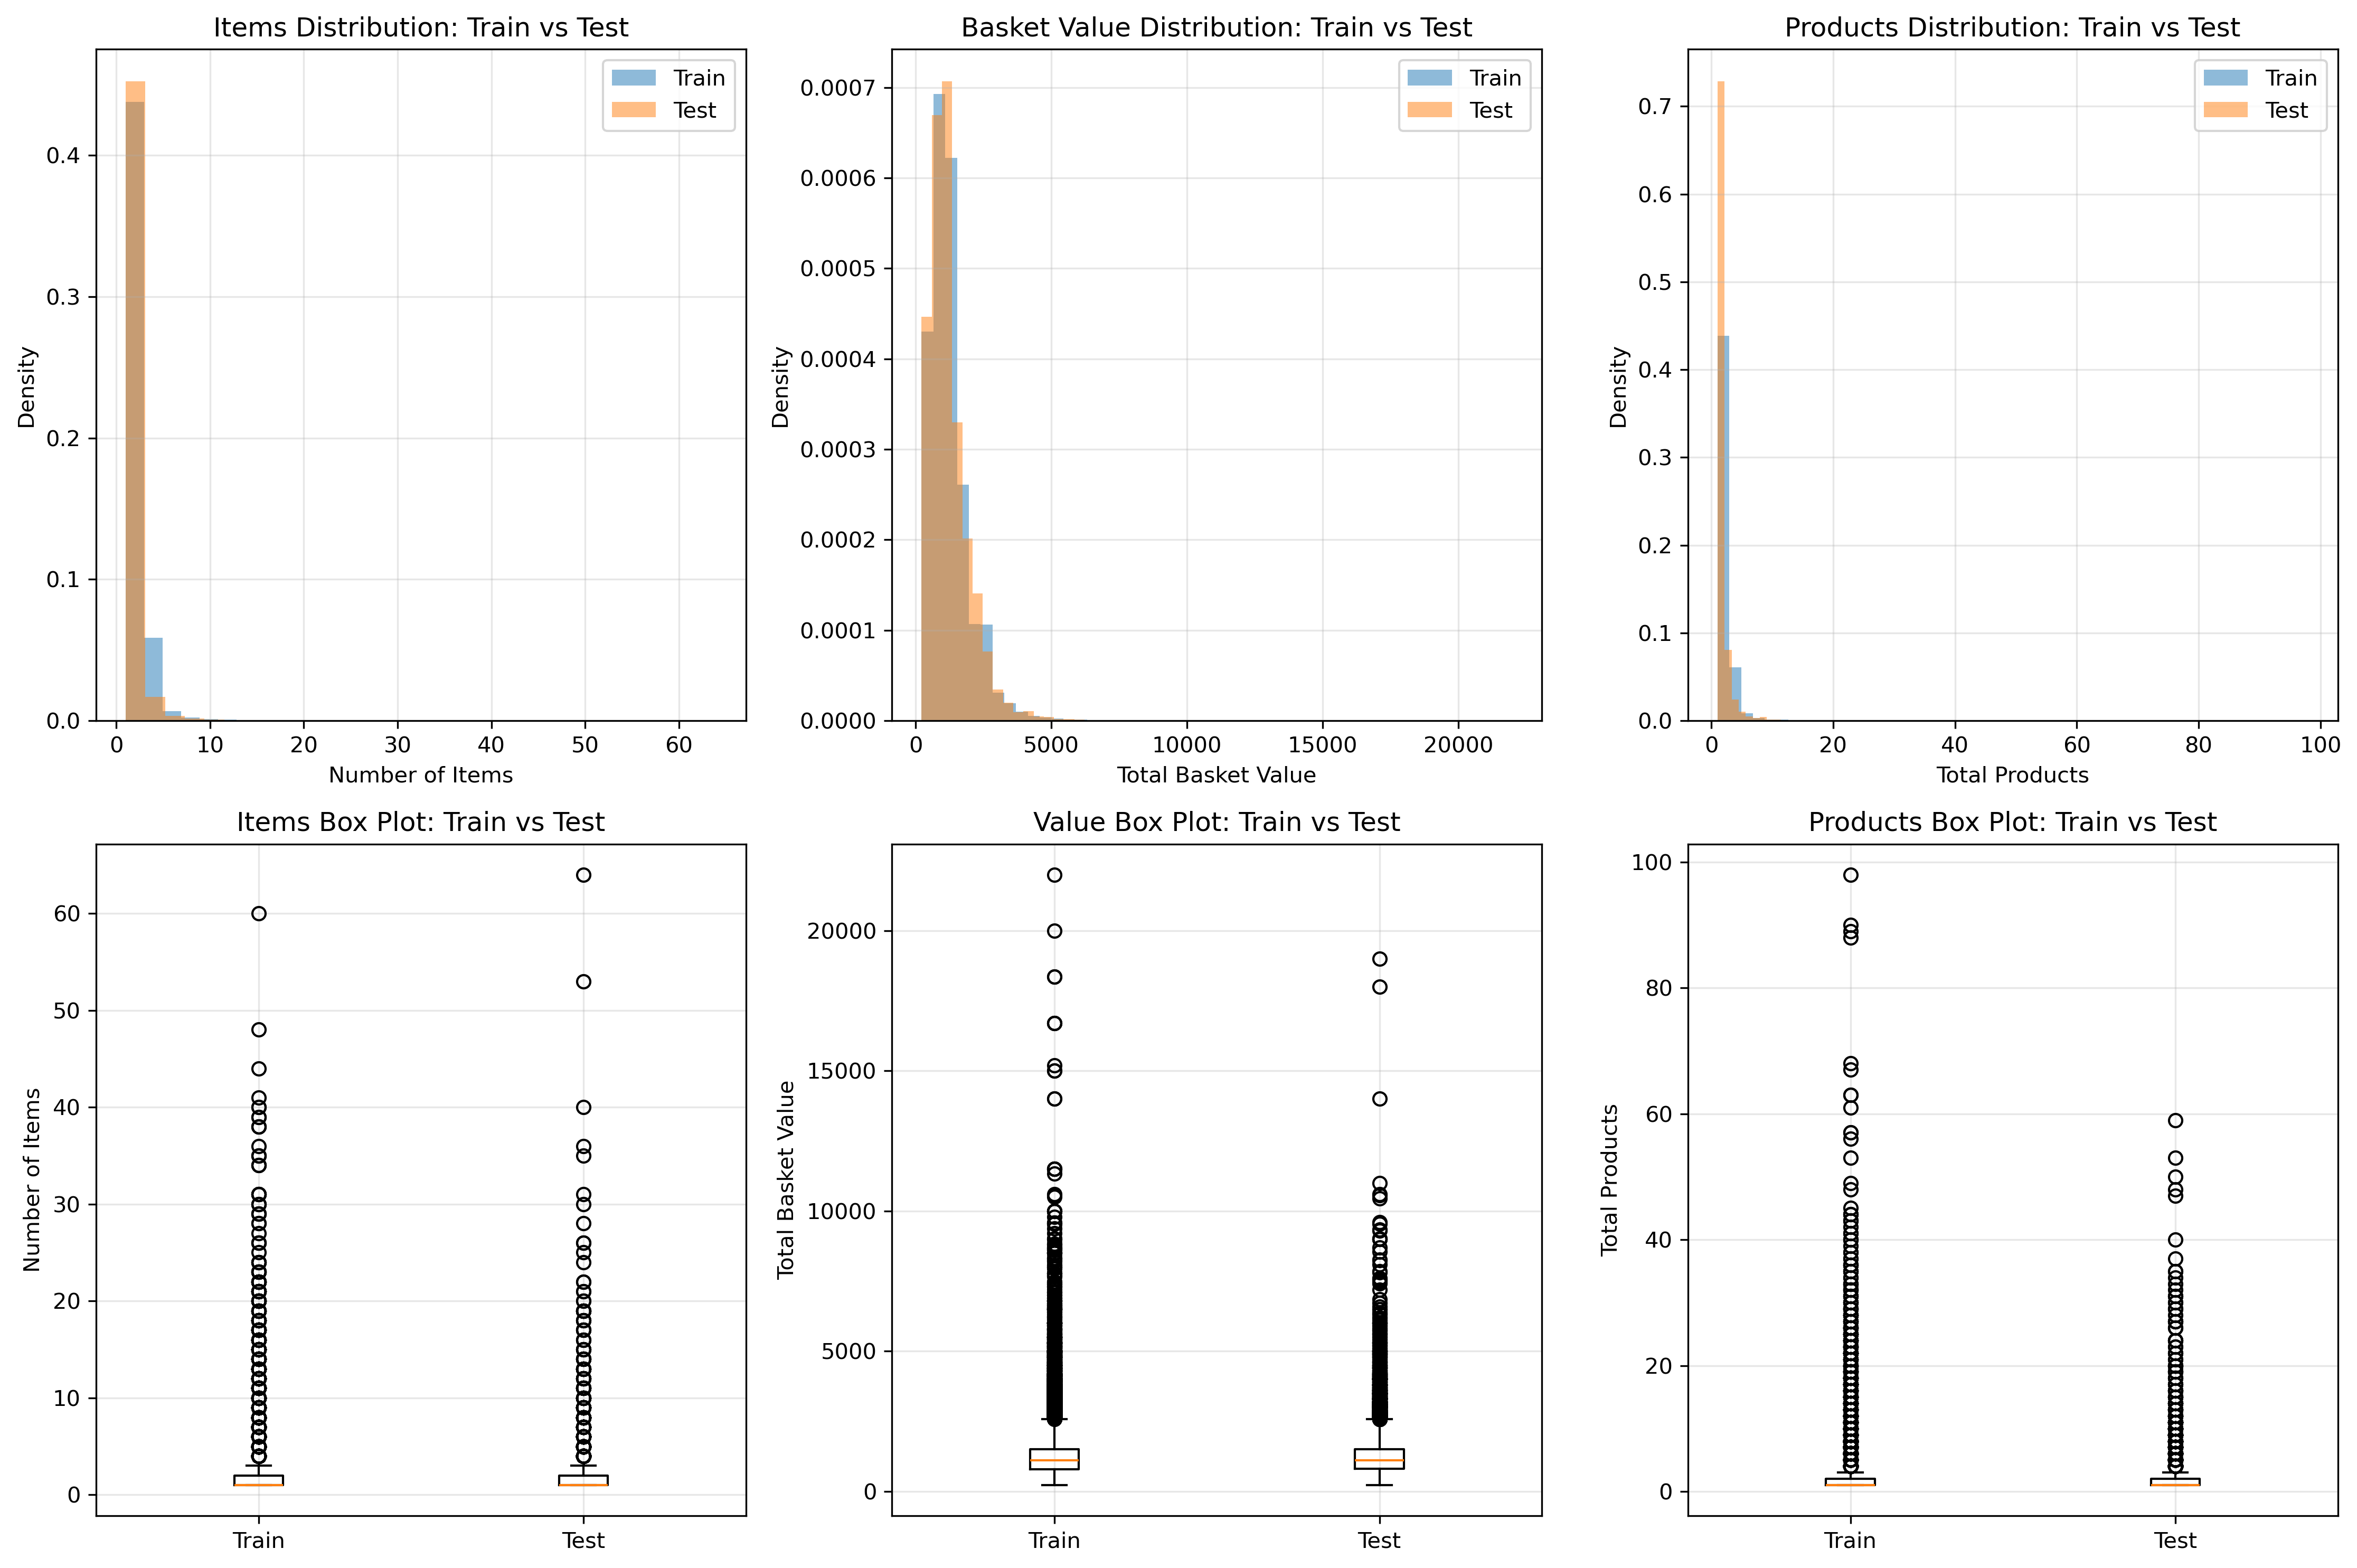


Kolmogorov-Smirnov Tests (Train vs Test):
Items: statistic=0.0049, p-value=0.7616
Value: statistic=0.0099, p-value=0.0535
Products: statistic=0.0057, p-value=0.5830

Distribution similarity assessment:
- p-value > 0.05: distributions are similar
- p-value <= 0.05: distributions are significantly different
Dataset saved: processed_data/train_test_comparison_stats.csv
Description: Statistical comparison between training and test datasets
Dataset saved: processed_data/ks_test_results.csv
Description: Kolmogorov-Smirnov test results for train vs test distribution similarity


In [14]:
# Train vs Test Data Comparison
print("=== TRAIN VS TEST DATA COMPARISON ===")

# Basic statistics comparison
print("Training vs Test Data Comparison:")
comparison_stats = pd.DataFrame(
    {
        "Train": [
            train_df["Nb_of_items"].mean(),
            train_df["TOTAL_BASKET_VALUE"].mean(),
            train_df["TOTAL_PRODUCTS"].mean(),
            train_df["Nb_of_items"].std(),
            train_df["TOTAL_BASKET_VALUE"].std(),
            train_df["TOTAL_PRODUCTS"].std(),
        ],
        "Test": [
            test_df["Nb_of_items"].mean(),
            test_df["TOTAL_BASKET_VALUE"].mean(),
            test_df["TOTAL_PRODUCTS"].mean(),
            test_df["Nb_of_items"].std(),
            test_df["TOTAL_BASKET_VALUE"].std(),
            test_df["TOTAL_PRODUCTS"].std(),
        ],
    },
    index=[
        "Items_Mean",
        "Value_Mean",
        "Products_Mean",
        "Items_Std",
        "Value_Std",
        "Products_Std",
    ],
)

print(comparison_stats)

# Visualizations comparing train and test
plt.figure(figsize=(15, 10))

plt.subplot(2, 3, 1)
plt.hist(train_df["Nb_of_items"], bins=30, alpha=0.5, label="Train", density=True)
plt.hist(test_df["Nb_of_items"], bins=30, alpha=0.5, label="Test", density=True)
plt.xlabel("Number of Items")
plt.ylabel("Density")
plt.title("Items Distribution: Train vs Test")
plt.legend()
plt.grid(True, alpha=0.3)

plt.subplot(2, 3, 2)
plt.hist(
    train_df["TOTAL_BASKET_VALUE"], bins=50, alpha=0.5, label="Train", density=True
)
plt.hist(test_df["TOTAL_BASKET_VALUE"], bins=50, alpha=0.5, label="Test", density=True)
plt.xlabel("Total Basket Value")
plt.ylabel("Density")
plt.title("Basket Value Distribution: Train vs Test")
plt.legend()
plt.grid(True, alpha=0.3)

plt.subplot(2, 3, 3)
plt.hist(train_df["TOTAL_PRODUCTS"], bins=50, alpha=0.5, label="Train", density=True)
plt.hist(test_df["TOTAL_PRODUCTS"], bins=50, alpha=0.5, label="Test", density=True)
plt.xlabel("Total Products")
plt.ylabel("Density")
plt.title("Products Distribution: Train vs Test")
plt.legend()
plt.grid(True, alpha=0.3)

plt.subplot(2, 3, 4)
# Box plot comparison
data_to_plot = [train_df["Nb_of_items"], test_df["Nb_of_items"]]
plt.boxplot(data_to_plot, labels=["Train", "Test"])
plt.ylabel("Number of Items")
plt.title("Items Box Plot: Train vs Test")
plt.grid(True, alpha=0.3)

plt.subplot(2, 3, 5)
data_to_plot = [train_df["TOTAL_BASKET_VALUE"], test_df["TOTAL_BASKET_VALUE"]]
plt.boxplot(data_to_plot, labels=["Train", "Test"])
plt.ylabel("Total Basket Value")
plt.title("Value Box Plot: Train vs Test")
plt.grid(True, alpha=0.3)

plt.subplot(2, 3, 6)
data_to_plot = [train_df["TOTAL_PRODUCTS"], test_df["TOTAL_PRODUCTS"]]
plt.boxplot(data_to_plot, labels=["Train", "Test"])
plt.ylabel("Total Products")
plt.title("Products Box Plot: Train vs Test")
plt.grid(True, alpha=0.3)

plt.tight_layout()
save_figure("09_train_vs_test_comparison", "Training vs Test Data Comparison")
plt.show()

# Statistical tests for distribution similarity
from scipy import stats

# Kolmogorov-Smirnov tests
ks_items = stats.ks_2samp(train_df["Nb_of_items"], test_df["Nb_of_items"])
ks_value = stats.ks_2samp(train_df["TOTAL_BASKET_VALUE"], test_df["TOTAL_BASKET_VALUE"])
ks_products = stats.ks_2samp(train_df["TOTAL_PRODUCTS"], test_df["TOTAL_PRODUCTS"])

print("\nKolmogorov-Smirnov Tests (Train vs Test):")
print(f"Items: statistic={ks_items.statistic:.4f}, p-value={ks_items.pvalue:.4f}")
print(f"Value: statistic={ks_value.statistic:.4f}, p-value={ks_value.pvalue:.4f}")
print(
    f"Products: statistic={ks_products.statistic:.4f}, p-value={ks_products.pvalue:.4f}"
)

print("\nDistribution similarity assessment:")
print("- p-value > 0.05: distributions are similar")
print("- p-value <= 0.05: distributions are significantly different")

# Save comparison analysis
save_dataset(
    comparison_stats,
    "train_test_comparison_stats",
    "Statistical comparison between training and test datasets",
)

# Save statistical test results
ks_results_df = pd.DataFrame(
    {
        "feature": ["Nb_of_items", "TOTAL_BASKET_VALUE", "TOTAL_PRODUCTS"],
        "ks_statistic": [ks_items.statistic, ks_value.statistic, ks_products.statistic],
        "p_value": [ks_items.pvalue, ks_value.pvalue, ks_products.pvalue],
        "similar_distributions": [
            ks_items.pvalue > 0.05,
            ks_value.pvalue > 0.05,
            ks_products.pvalue > 0.05,
        ],
    }
)
save_dataset(
    ks_results_df,
    "ks_test_results",
    "Kolmogorov-Smirnov test results for train vs test distribution similarity",
)

In [15]:
# Final Data Export - Complete Enhanced Datasets
print("=== FINAL DATA EXPORT ===")

# Save complete enhanced training dataset with all derived features
print("Enhanced training dataset features:")
enhanced_features = [
    "TOTAL_BASKET_VALUE",
    "TOTAL_PRODUCTS",
    "UNIQUE_CATEGORIES",
    "UNIQUE_MANUFACTURERS",
    "UNIQUE_MODELS",
    "UNIQUE_CODES",
    "AVG_QTY_PER_ITEM",
    "MAX_QTY_PER_ITEM",
    "AVG_PRICE_PER_PRODUCT",
    "COMPOSITE_OUTLIER_SCORE",
    "IS_PRICE_OUTLIER",
    "IS_QTY_OUTLIER",
    "IS_HIGH_ITEMS_OUTLIER",
]

for feature in enhanced_features:
    if feature in train_df.columns:
        print(f"✓ {feature}")
    else:
        print(f"✗ {feature} (missing)")

# Save complete enhanced datasets
print(
    f"\nSaving complete enhanced training dataset with {len(train_df.columns)} features..."
)
save_dataset(
    train_df,
    "train_complete_enhanced",
    "Complete training dataset with all EDA-derived features for anomaly detection",
)

print(f"Saving enhanced test dataset with {len(test_df.columns)} features...")
save_dataset(
    test_df, "test_enhanced", "Enhanced test dataset with basic derived features"
)

# Create summary statistics for the enhanced dataset
summary_stats = pd.DataFrame(
    {
        "feature": enhanced_features,
        "mean": [
            train_df[col].mean() if col in train_df.columns else np.nan
            for col in enhanced_features
        ],
        "std": [
            train_df[col].std() if col in train_df.columns else np.nan
            for col in enhanced_features
        ],
        "min": [
            train_df[col].min() if col in train_df.columns else np.nan
            for col in enhanced_features
        ],
        "max": [
            train_df[col].max() if col in train_df.columns else np.nan
            for col in enhanced_features
        ],
        "unique_values": [
            train_df[col].nunique() if col in train_df.columns else np.nan
            for col in enhanced_features
        ],
    }
)

save_dataset(
    summary_stats,
    "enhanced_features_summary",
    "Summary statistics for all EDA-derived features",
)

print("\n=== EDA COMPLETE ===")
print(f"Total figures saved: {len([f for f in FIGURE_PATH.glob('*.png')])}")
print(f"Total datasets saved: {len([f for f in PROCESSED_DATA_PATH.glob('*.csv')])}")
print(f"\nFigures directory: {FIGURE_PATH.absolute()}")
print(f"Processed data directory: {PROCESSED_DATA_PATH.absolute()}")

# List all saved files
print("\nSaved figures:")
for fig_file in sorted(FIGURE_PATH.glob("*.png")):
    print(f"  - {fig_file.name}")

print("\nSaved datasets:")
for data_file in sorted(PROCESSED_DATA_PATH.glob("*.csv")):
    print(f"  - {data_file.name}")

=== FINAL DATA EXPORT ===
Enhanced training dataset features:
✓ TOTAL_BASKET_VALUE
✓ TOTAL_PRODUCTS
✓ UNIQUE_CATEGORIES
✓ UNIQUE_MANUFACTURERS
✓ UNIQUE_MODELS
✓ UNIQUE_CODES
✓ AVG_QTY_PER_ITEM
✓ MAX_QTY_PER_ITEM
✓ AVG_PRICE_PER_PRODUCT
✓ COMPOSITE_OUTLIER_SCORE
✓ IS_PRICE_OUTLIER
✓ IS_QTY_OUTLIER
✓ IS_HIGH_ITEMS_OUTLIER

Saving complete enhanced training dataset with 159 features...
Dataset saved: processed_data/train_complete_enhanced.csv
Description: Complete training dataset with all EDA-derived features for anomaly detection
Saving enhanced test dataset with 148 features...
Dataset saved: processed_data/train_complete_enhanced.csv
Description: Complete training dataset with all EDA-derived features for anomaly detection
Saving enhanced test dataset with 148 features...
Dataset saved: processed_data/test_enhanced.csv
Description: Enhanced test dataset with basic derived features
Dataset saved: processed_data/enhanced_features_summary.csv
Description: Summary statistics for all EDA-d